In [1285]:
import proteomic_funcs
import importlib
importlib.reload(proteomic_funcs)
import matplotlib.pyplot as plt
from proteomic_funcs import *
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# Preprocessing

1143054
5655812
1777711
5385993


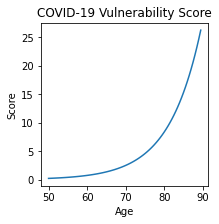

In [1286]:
%run -i /home/eduff/biobank/BIACOB/PreProc.py

# OLINK

1164
1165
1173
1150
1145
1173


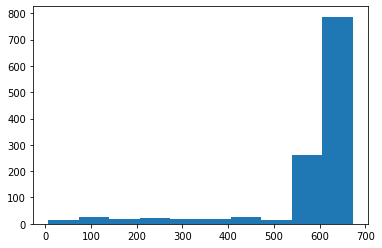

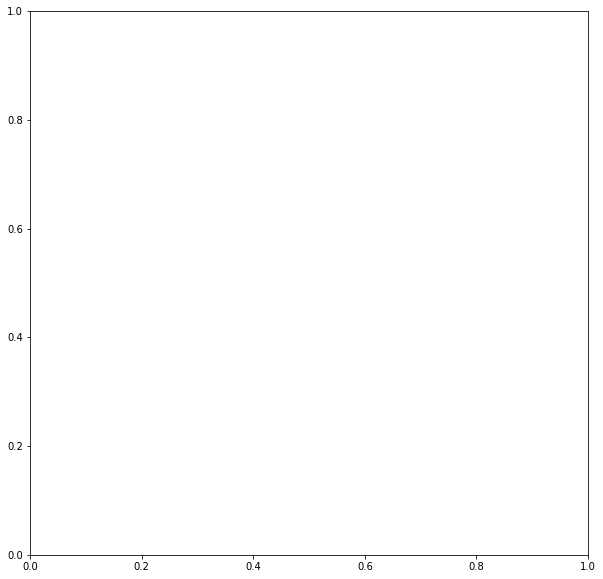

In [1295]:
%run -i /home/eduff/biobank/BIACOB/OLINK.py

# Proteomic Correlation plots  


[Text(0.5, 0, 'Ab40'),
 Text(1.5, 0, 'Ab42'),
 Text(2.5, 0, 'Ab42/Ab40'),
 Text(3.5, 0, 'pTau-181'),
 Text(4.5, 0, 'NfL'),
 Text(5.5, 0, 'GFAP')]

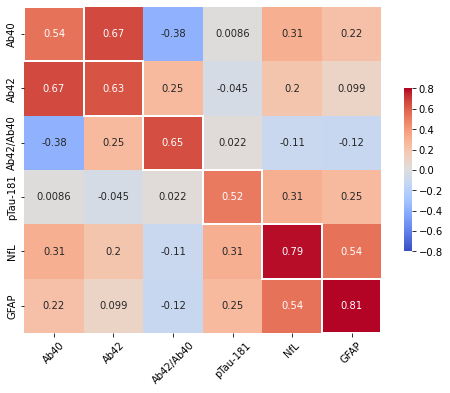

In [1296]:


vars=(['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl'] )
vars_names=(['Ab40', 'Ab42', 'Ab42/Ab40','pTau-181', 'NfL', 'GFAP'])
vars_pre=[a + '_pre' for a in vars] 
vars_post= [a + '_post' for a in vars]

corr_map_post= data.loc[:,vars_post].corr()
corr_map_pre= data.loc[:,vars_pre].corr()


for a in corr_map_pre.columns:
    corr_map_pre.loc[a,a]=data.loc[all_matched,[a,a.replace('pre','post')]].corr().values[0,1]
    corr_map_post.loc[a,a]=corr_map_pre.loc[a,a]


corr_map_pre.columns=vars_names
corr_map_pre.index=vars_names

#mask_m = np.tril(corr_map_regPl_post,k=-1)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_map_pre,cmap="coolwarm",vmin=-.8,vmax=.8, annot=True, ax=ax,cbar_kws={"shrink": 0.5})

# Highlight diagonal with white outline
for i in range(len(corr_map_pre)):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='white', lw=2))

ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=45)

In [1297]:
corr_map_pre.to_excel('/home/eduff/biobank/tables_test/corr_map_pre.xlsx')

# Demographic histograms

In [1301]:
os.chdir('/home/eduff/biobank/')

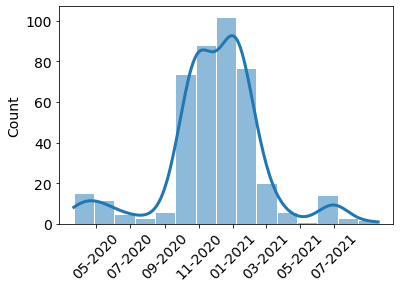

In [1302]:
from matplotlib.dates import DateFormatter
ax=sns.histplot(data=data.loc[all_matched,:],x='firstpos',bins=15,edgecolor="white",kde=True,line_kws={'lw': 3})
out=plt.xticks(rotation=45,fontsize=14)
date_form = DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(date_form)
plt.ylabel('Count',fontsize=14)
plt.xlabel('')
out=plt.xticks(out[0][1:-1],rotation=45,fontsize=14)
outy=plt.yticks(fontsize=14)
fig=plt.gcf()
fig.savefig('tables_test/DataCOVID_fig1.svg', bbox_inches = "tight")
#ax.set_title('Estimated dates of symptomatic COVID')
#ax.set_xlabel('Date of first recorded positive')

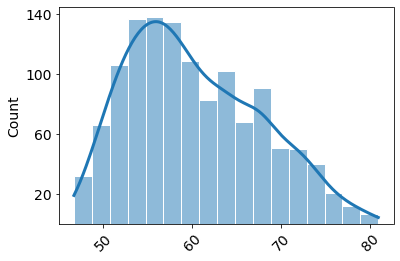

In [1303]:
ax=sns.histplot(data=data.loc[all_matched,:],  x="Age-2.0",edgecolor='white',kde=True,line_kws={'lw': 3})
ax.set_title('Participant ages (pre-pandemic assessment visit)',fontsize=14)
ax.set_title('',fontsize=14)
ax.set_xlabel('Age',fontsize=14)

#date_form = DateFormatter("%m-%Y")
#ax.xaxis.set_major_formatter(date_form)
plt.ylabel('Count',fontsize=14)
plt.xlabel('')
out=plt.xticks([50,60,70,80],rotation=45,fontsize=14)
outy=plt.yticks([20,60,100,140],fontsize=14)
fig=plt.gcf()
fig.savefig('tables_test/Ages_fig1.svg', bbox_inches = "tight")

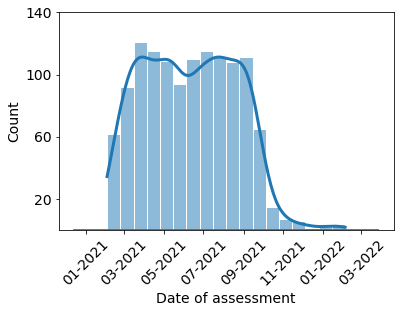

In [1304]:
ax=sns.kdeplot(data=data.loc[all_matched,:],  x='date_post')
ax=sns.histplot(data=data.loc[all_matched,:],  x='date_post',edgecolor='white',bins=18,kde=True,line_kws={'lw': 3})

ax.set_title('Pandemic assessment visit dates ',fontsize=14)
ax.set_title('',fontsize=14)
ax.set_xlabel('Date of assessment',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
date_form = DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(date_form)
outy=plt.yticks(fontsize=14)
outy=plt.yticks([20,60,100,140],fontsize=14)
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=45,fontsize=14)
fig=plt.gcf()
fig.savefig('tables_test/PandDates_fig1.svg', bbox_inches = "tight")

In [1305]:
data.loc[all_matched&all_case,"assessment_sep_m"].min()

12

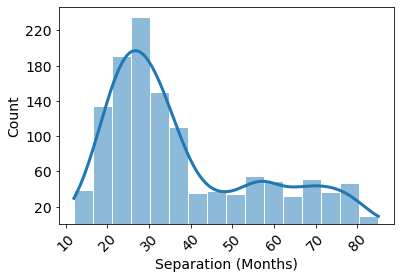

In [1306]:
ax=sns.histplot(data=data.loc[all_matched,:],  x="assessment_sep_m",edgecolor='white',kde=True,line_kws={'lw': 3})
ax.set_title('Separation between assessments',fontsize=14)
ax.set_title('',fontsize=14)
ax.set_xlabel('Separation (Months)',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
outy=plt.yticks([20,60,100,140,180,220],fontsize=14)
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=45,fontsize=14)
fig=plt.gcf()
fig.savefig('tables_test/Seps_fig1.svg', bbox_inches = "tight")

In [1307]:
data.loc[all_matched,"assessment_sep_m"].max()

85

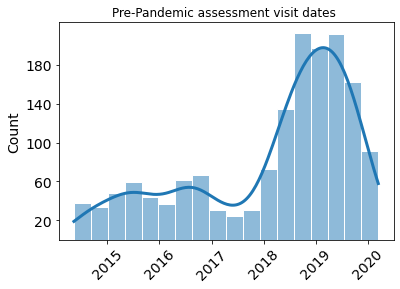

In [1308]:
ax=sns.histplot(data=data,  x='date_pre',edgecolor='white',bins=18,kde=True,line_kws={'lw': 3})
ax.set_title('Pre-Pandemic assessment visit dates ')
ax.set_xlabel('Date of assessment',fontsize=14)
ax.set_ylabel('Count')
outy=plt.yticks([20,60,100,140,180],fontsize=14)
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=45,fontsize=14)
ax.set_yticklabels(labels=ax.get_yticklabels(),fontsize=14)

plt.ylabel('Count',fontsize=14)
plt.xlabel('')
fig=plt.gcf()
fig.savefig('tables_test/PrePand_fig1.svg', bbox_inches = "tight")

,HES,PCR,GP,Lateral
eid,,,,
1024229,False,True,True,True
1037373,False,True,True,False
1043160,False,False,False,True
1055982,True,True,True,True
1058801,False,False,False,True
...,...,...,...,...
6004696,False,True,True,True
6013979,False,True,True,False
6016344,False,True,False,True


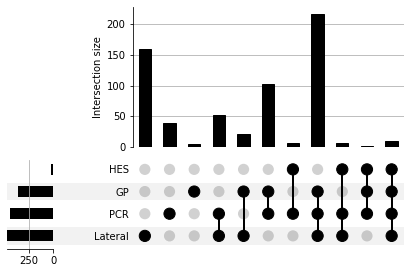

In [1309]:
import upsetplot
upsetdata=upsetplot.from_indicators(data.loc[all_case&all_matched,['HES','PCR','GP','Lateral']])
upsetplot.plot(upsetdata,subset_size="count") 
#data.loc[all_case,['HES','PCR','GP','Lateral']].
data.loc[all_case,['HES','PCR','GP','Lateral']]

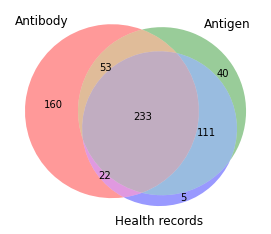

In [1310]:
from matplotlib_venn import venn3
set1=set(data[data.loc[:,'Lateral']&all_case&all_matched].index)
set2=set(data[data.loc[:,'PCR']&all_case&all_matched].index)
set3=set(data[data.loc[:,'PublicHealthRecord']&all_case&all_matched].index)

venn3([set1, set2,set3],['Antibody','Antigen','Health records'])

fig=plt.gcf()
fig.savefig('tables_test/Venn.svg', bbox_inches = "tight")

## eGFR

In [1454]:
# eGFR only abvailable on 0/1st visist

# CDK-EPI equation for GFR:

# GFR = 141 * min(Scr / k, 1)^a * max(Scr / k, 1)^-1.209 * 0.993^data['Age- * 1.018 

find_vars(data,'30720')
23478
SCr=data.loc[:,'30700-0.0']

kk=0.7+0.2*data['22001-0.0']

alpha=-0.329 - data['22001-0.0']*(0.411-0.329)

sex_mult = 1-.018 * (data['22001-0.0']-1)

eth_mult = 1+ 0.159 * (((data.loc[:,find_vars(data,'^21000-2')]>4000).sum(axis=1))/2)

GFR = 141 * np.minimum(SCr / kk, 1)**alpha * np.maximum(SCr / kk, 1)**-1.209 * 0.993**(data['Age-0.0']) * sex_mult * eth_mult
data.loc[:,'GFR_Cr-0.0']=GFR


In [1312]:
# # eGFR only abvailable on 0/1st visist
# from statsmodels.nonparametric.kernel_regression import KernelReg
# # CDK-EPI equation for Cys GFR:


# GFR = 133 * min(Scys/0.8, 1)-0.499 x max(Scys/0.8, 1)-1.328 * 0.996**Age x 0.932 [if female]

# generate estimator of standardised CST3 from OLINK levels:
from statsmodels.nonparametric.kernel_regression import KernelReg
estdata=data.loc[:,['P_CST3_0','P_CST3_pre','P_CST3_post','30720-0.0']].dropna()
kde_cys = KernelReg(endog=estdata.loc[:,'30720-0.0'], exog=estdata.loc[:,'P_CST3_0'], var_type='c', bw=[12])
sex_mult = 1 - (1-0.932) * (1-data['22001-0.0'])

for a in ['_0','_pre','_post']:
    if a=='_0':
        age=data.loc[estdata.index,'Age-0.0']
    elif a=='_pre':
        age=data.loc[estdata.index,'Age-2.0']
    elif a=='_post':
        age=data.loc[estdata.index,'Age-3.0']

    SCys= kde_cys.fit(estdata.loc[:,'P_CST3'+a])[0]
    data.loc[estdata.index,'P_CST3'+a+'_cl']=SCys
    data.loc[estdata.index,'GFR_Cys'+a+'_cl'] = 133 * np.minimum(SCys/0.8, 1)**0.499 * np.maximum(SCys / 0.8, 1)**-1.328 * 0.996**age * sex_mult 
data.loc[estdata.index,'GFR_Cys'+'_diff'+'_cl'] =data.loc[estdata.index,'GFR_Cys'+'_post'+'_cl'] -data.loc[estdata.index,'GFR_Cys'+'_pre'+'_cl'] 

data=data.copy()

# Sample Counts


In [1313]:
all_matched.values.sum()

1248

In [1314]:
data.loc[:,[ a + '_matched' for a in ['Ab42/Ab40','Ab42','Ab40','pTau-181','NfL','GFAP']]].sum()/2

Ab42/Ab40_matched    614.0
Ab42_matched         617.0
Ab40_matched         615.0
pTau-181_matched     610.0
NfL_matched          619.0
GFAP_matched         620.0
dtype: float64

In [1315]:
# hospitalised
(data.loc[:,'Case_hosp_matched']=='sars_hosp').sum()

26

In [1316]:
# vaccinated
print('prior to positive: ' + str((data.loc[all_matched,'vac_prior_first_pos']==True).sum()))
print('following positive: ' + str((data.loc[all_matched,'vac_prior_first_pos']==False).sum()))
# vaccinated assessment
print('prior to assessment (Case): ' + str((data.loc[all_case,'vac_prior_assess']==True).sum()))
print('following assessment (Case): ' + str((data.loc[all_case,'vac_prior_assess']==False).sum()))
print('prior to assessment (Control): ' + str((data.loc[all_control,'vac_prior_assess']==True).sum()))
print('following assessment (Control): ' + str((data.loc[all_control,'vac_prior_assess']==False).sum()))

prior to positive: 40
following positive: 249
prior to assessment (Case): 479
following assessment (Case): 18
prior to assessment (Control): 490
following assessment (Control): 16


In [1317]:
(data.loc[all_matched,'vac_prior_assess']==False).sum()

28

In [1318]:
column='adni_mean_cl-2.0'
df_c=data.loc[all_matched,[column,'matched_eid','Case']]
groupby='Case'
group='sars'
ids_case = df_c.loc[df_c[groupby]==group,column].dropna().index
ids_ctr=df_c.loc[ids_case,'matched_eid'].dropna().values
ids_ctr=df_c.loc[ids_ctr,column].dropna().index
ids_case=df_c.loc[ids_ctr,'matched_eid']
len(ids_ctr)

590

In [1322]:
any_Olink=data.loc[all_matched,find_vars(data,'^P_.*diff_cl')].any(axis=1)
len(np.intersect1d(data[all_matched][any_Olink]['matched_eid'].dropna().values,any_Olink[any_Olink].index))/2

277.0

In [1323]:
os.chdir('/home/eduff/biobank/')

# Demographics

In [1324]:
# human readable names for tables

cols_translate={'31-0.0':'Sex','GeneralHealth-2.0':'Health self-rating','cog_vars_gi-2.0':'Cognitive Ability Score','cog_vars_alz-2.0':'Cognition (AD)',
 '709-2.0':'Number in Household','738-2.0':'Income','6350-2.0':'Trail Making 2','Obesity-2.0':'Obesity','Obesity-3.0':'Obesity',
 'Smoking-2.0':'Smoker','20018-2.0':'Prospective Memory','GFR_Cys_pre_cl':'GFR (pre)','GFR_Cys_post_cl':'GFR (post)','21001-2.0': 'BMI ','21002-2.0': 'Weight','Age-2.0': 'Age (baseline)','Age-3.0': 'Age (pandemic)','adni_mean_cl-2.0': 'AD Neuroimaging Phenotype',
 '4080-2.0': 'BP (sys)','4079-2.0': 'BP (dia)','Hip/Waist-2.0': 'Hip/Waist Ratio','Alcohol-2.0': 'Alcohol Intake Freq',"Case_bin:Q('Age-2.0_f')":"Case (age weighted)","diabetes":'Type II Diabetes',"Diabetes2":'Type II Diabetes',
                "Case_bin:Q('adni_mean_cl-2.0')":'Case weighted NI sig',"Q('adni_mean_cl-2.0')":"Neuroimaging sig" , "vac_prior_assess":"COVID vaccinated","Case_vax_prior_bin":"Vaccinated prior",'Age-3.0_f':'Severity score (Age)','Age-2.0_f':'Severity score (Age)',
 'Case_hosp_bin': 'Hospitalised','Case_bin': 'Case/Control status','Case_bin:':'ARV : Case/Control status','C(Case_hosp)[T.sars]': 'Case/Control','depression':'Depression','Heart_Cond':'Heart Condition','hypertension':'Hypertension',
                'APOE_score':'APOE-e4 count','C(Case_hosp)[T.sars_hosp]': 'Hospitalised','assessment_sep': 'Assessment Interval (d)','A4': 'APOE4','50-0.0':'Height','Activity-2.0':'Moderate activity (min/d)','Activity-3.0':'Vigorous activity (min/d)','Activity_vig-2.0':'Vigorous activity (min/d)','Activity_vig-3.0':'Vigorous activity (min/d)','Wheeze-2.0':'Chest wheeze',
                '26207-0.0': 'AD PRS','Gender_pre': 'Sex','isolation-2.0':'Social Isolation','isolation-3.0':'Social Isolation','Education_age':'Age Education Complete','845-2.0':'Age Eduction Complete','845-3.0':'Age Eduction Complete', 'paid_employ-2.0':'Employed','paid_employ_bin-2.0':'Employed', 'retired-2.0':'Retired','22001-0.0': 'Genetic Sex','HandGrip-2.0':'Hand Grip','Wheeze_bin-2.0':'Chest wheeze',
                'GeneralHealth-3.0': 'Health self-rating', 'cog_vars_gi-2.0': 'Cognitive Ability Score', 'cog_vars_alz-2.0': 'Cognition (AD)','cog_vars_gi-3.0': 'Cognitive Ability Score', 'cog_vars_alz-3.0': 'Cognition (AD)', '709-3.0': 'Number in Household', '738-3.0': 'Income', '6350-3.0': 'Trail Making 2','WorkingThroughCOVID':'Working during COVID',
                'Smoking_bin-2.0':'Smoker','Smoking_bin-3.0': 'Smoker', '20018-3.0': 'Prospective Memory', '21001-3.0': 'BMI ', '21002-3.0': 'Weight', 'adni_mean_cl-3.0': 'AD Neuroimaging Phenotype',
                '4080-3.0': 'BP (sys)', '4079-3.0': 'BP (dia)', 'BP_meds':'Blood pressure medication', 'Chol_meds':'Cholesterol medication','Hip/Waist-3.0': 'Hip/Waist Ratio', 'Alcohol-3.0': 'Alcohol Intake Freq', "Case_bin:Q('Age-3.0_f')": 'Case (age weighted)', "Case_bin:Q('adni_mean_cl-3.0')": 'Case weighted NI sig', "Q('adni_mean_cl-3.0')": 'Neuroimaging sig'
               , 'A34':'APOE-e3e4', 'A33':'APOE-e3e3','Ethnicity(White)':'Ethnicity (white)' ,'30890-1.0':'Vitamin D','hearing-2.0':'Hearing Loss','hearing-3.0':'Hearing Loss','A32':'APOE-e3e2', 'A44':'APOE-e4e4','Insulin_meds':'Diabetes medications','COPD_ICD':'COPD','Bronc':'Emphysema','renal':'Renal condition','pre':'Baseline protein','assessment_sep^2':'Assessment Interval^2'}

# Classify variable types for tables

cols_translate_type={'31-0.0':'Demographics','GeneralHealth-2.0':'Health measure','cog_vars_gi-2.0':'Cognition','cog_vars_alz-2.0':'Cognition',
 '709-2.0':'Life Status','738-2.0':'Life Status','isolation-2.0':'Life Status','isolation-3.0':'Life Status','6350-2.0':'Cognition','hearing-2.0':'Comorbidity','hearing-3.0':'Comorbidity','Obesity-2.0':'Comorbidity','Obesity-3.0':'Comorbidity','diabetes':'Comorbidity',
 'Smoking-2.0':'Life Status','20018-2.0':'Cognition','GFR_Cys_pre_cl':'Health measure','GFR_Cys_post_cl':'Health measure','21001-2.0': 'Health measure','21002-2.0': 'Demographics','Age-2.0': 'Demographics','adni_mean_cl-2.0': 'Neuroimaging',
 '4080-2.0': 'Health measure','4079-2.0':'Health measure','Hip/Waist-2.0': 'Health measure','30890-1.0':'Health measure','Alcohol-2.0': 'Life Status','Deprivation':'Life Status','50-0.0':'Demographics','Heart_Cond':'Comorbidity',
                "Case_bin:Q('adni_mean_cl-2.0')":'Neuroimaging',"Q('adni_mean_cl-2.0')":"Neuroimaging",'vac_prior_assess':'Medications', "vac_prior_assess":"Medications","Case_vax_prior_bin":"Medications",'Age-3.0_f':'Risk score','Age-2.0_f':'Risk score',
 'Case_hosp_bin': 'Hospitalised','Case_bin': 'Case/Control status','C(Case_hosp)[T.sars]': 'Case/Control','GeneralHealth-2.0':'Health measure','depression':'Comorbidity','heart_cond':'Comorbidity','hypertension':'Comorbidity','Diabetes2':'Comorbidity','Diabetes':'Comorbidity','IBS':'Comorbidity',
                'APOE_score':'Genetics','assessment_sep': 'Experiment','A4': 'Genetic','A33vA34':'Genetic','A33vA44': 'Genetic','Activity_vig-2.0':'Life Status','Activity_vig-3.0':'Life Status','Activity-2.0':'Life Status','Activity-3.0':'Life Status','KeyWorker':'Life Status','WorkingThroughCOVID':'Life Status','738-3.0': 'Life Status',
                '26207-0.0': 'AD PRS','Gender_pre': 'Demographics','Education_age':'Life Status','paid_employ_bin-2.0':'Life Status','paid_employ-2.0':'Life Status', 'retired-2.0':'Life Status','22001-0.0': 'Genetic Sex','BP_meds':'Medications','Chol_meds':'Medications','31-0.0':'Demographics','31-0.0':'Demographics',
                'GeneralHealth-3.0': 'Health measure','Ethnicity(White)':'Demographics',  'cog_vars_gi-2.0': 'Cognition', 'cog_vars_alz-2.0': 'Cognition','cog_vars_gi-3.0': 'Cognition', 'cog_vars_alz-3.0': 'Cognition', '709-3.0': 'Life Status','HandGrip-2.0':'Health measure','Wheeze_bin-2.0':'Health measure','Wheeze-2.0':'Health measure',
                     '738-3.0':'Life Status', '6350-3.0': 'Cognition', 'Smoking_bin-2.0':'Life Status','Smoking_bin-3.0': 'Life Status', '20018-3.0': 'Cognition', '21001-3.0': 'Health Measure', '21002-3.0': 'Demographics', 'Age-3.0': 'Demographics', 'adni_mean_cl-3.0': 'Neuroimaging', '4080-3.0': 'Health Measure', '4079-3.0': 'Health Measure', 'Hip/Waist-3.0': 'Demographics', 'Alcohol-3.0': 'Life Status', "Case_bin:Q('adni_mean_cl-3.0')": 'Neuroimaging', "Q('adni_mean_cl-3.0')": 'Neuroimaging'
                     , 'A34':'Genetics', 'A33':'Genetics', 'A32':'Genetics', 'A44':'Genetics','Insulin_meds':'Medications','COPD_ICD':'Comorbidity','Bronc':'Comorbidity','renal':'Comorbidity'}

In [1325]:
# variables/confounds for which we are assessing associations

vars={}
tables={}

ext='-2.0'

#boolean/discrete
vars['genetics'] = ['A4','ABCA7','APOE', 'BDNF', 'CLU', 'PICALM',  'SORL1', 'TREM2', 'WWTR1', 'OAS1', 'CR1', 'PLD3']#,'26223-0.0','26206-0.0', '26216-0.0','26242-0.0','26260-0.0']

SIMOA_assays = ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']
assays = ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl','GFAP_regPl']#,'P_GFAP']#+ ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']

vars['imaging_vars-2.0']=[a + '-2.0' for a in imaging_vars] 
vars['OLINK_pre']=[ pp+'_pre_cl' for pp in OLINK_assays_final]
vars['OLINK_post']=[ pp+'_post_cl' for pp in OLINK_assays_final]

PRS.index=[str(a) for a in PRS.index]
vars['PRS-2.0']=[a + '-2.0' for a in PRS.index]
vars['PRS']=[a + '-0.0' for a in PRS.index]


In [1326]:
# groupings of variables

col_names=['Control','SARS-COV-2']
els=(all_matched  )

vars['pre']=['Age-2.0','Age-2.0_f','22001-0.0','50-0.0','21002-2.0','APOE_score','Hip/Waist-2.0','21001-2.0','4080-2.0',
           '4079-2.0','HandGrip-2.0','Wheeze_bin-2.0','GFR_Cys_pre_cl','Alcohol-2.0','Smoking_bin-2.0','Deprivation','738-2.0','709-2.0',
           'KeyWorker','paid_employ_bin-2.0','retired_bin-2.0','Activity-2.0','Activity_vig-2.0','Diabetes2','Heart_Cond',
           'Obesity-2.0','hypertension','depression','IBS','COPD_ICD','Bronc','renal','BP_meds','Chol_meds','Insulin_meds','20018-2.0',
           'GeneralHealth-2.0','adni_mean_cl-2.0','6350-2.0','A33vA34','A33vA44','Case_vax_prior_bin',
           'Diabetes','Ethnicity(White)','WorkingThroughCOVID','cog_vars_alz-2.0','cog_vars_gi-2.0','heart_cond','845-2.0', 'isolation-2.0']# ,'Wheeze-2.0','Activity_days-2.0','Activity_vig_days-2.0','TV-2.0'] 'caring-2.0','no_employ-sick-2.0','unemployed-2.0','voluntary-2.0',

vars['show']=['Age-2.0','Age-3.0','31-0.0','50-0.0','21002-2.0','Ethnicity(White)','A34','A44','A32','Hip/Waist-2.0','21001-2.0','4080-2.0',
           '4079-2.0','HandGrip-2.0','Wheeze-2.0','GeneralHealth-2.0','GFR_Cys_pre_cl','Age-2.0_f','Alcohol-2.0','Smoking-2.0','Deprivation','738-2.0','709-2.0',
           'KeyWorker','paid_employ-2.0','isolation-2.0','Activity-2.0','Activity_vig-2.0','Diabetes2','Heart_Cond',
           'Obesity-2.0','hypertension','depression','IBS','COPD_ICD','Bronc','BP_meds','Chol_meds','Insulin_meds','vac_prior_assess','cog_vars_gi-2.0',
           'adni_mean_cl-2.0']#,,,'Activity_days-2.0','Activity_vig_days-2.0','TV-2.0'] 'caring-2.0','no_employ-sick-2.0','unemployed-2.0','voluntary-2.0',

vars['pre_comorb']=['Age-2.0_f','22001-0.0','21002-2.0','Ethnicity(White)','APOE_score','Hip/Waist-2.0','21001-2.0','4080-2.0',
           '4079-2.0','GeneralHealth-2.0','GFR_Cys_pre_cl','Alcohol-2.0','Smoking_bin-2.0','845-2.0', 'KeyWorker','Activity-2.0','isolation-2.0','Diabetes2','Heart_Cond',
           'Obesity-2.0','hypertension','depression','IBS','BP_meds','Chol_meds','cog_vars_gi-2.0',
           'adni_mean_cl-2.0']#,'Wheeze-2.0','Activity_days-2.0','50-0.0','Activity_vig_days-2.0','TV-2.0'] 'caring-2.0','no_employ-sick-2.0','paid_employ_bin-2.0','unemployed-2.0','voluntary-2.0','hearing-2.0',


vars['post']=[ a.replace('-2.0','-3.0') for a in vars['pre']]
vars['post_comorb']=[ a.replace('-2.0','-3.0') for a in vars['pre_comorb']]
vars['dev_pre'] = ['P_CA9_pre','P_ATP5IF1_pre']
vars['dev_post'] = ['P_CA9_post','P_ATP5IF1_post']
vars['park'] = ['P_SNCG']
vars['CA9'] = ['P_CA9','P_ATP5IF1']

ext='_diff'
vars['diff']=[ a + ext for a in ['4080','4079','21002','Hip/Waist',\
   '21001','Alcohol','738','Smoking_bin','709','Obesity',\
     '6350','20018', '894' ,'adni_mean_cl','cog_vars_alz','cog_vars_gi','GeneralHealth','Activity']]
vars['OLINK_pre']=[ pp+'_pre_cl' for pp in OLINK_assays_final]
vars['OLINK_post']=[ pp+'_post_cl' for pp in OLINK_assays_final]
vars['OLINK_diff']=[ pp+'_diff_cl' for pp in OLINK_assays_final]
vars['diseases_pre']=[a+'_pre_cl' for a in diseases]
vars['diseases_post']=[a+'_post_cl' for a in diseases]
vars['pre_post_age_sex']=['Age-3.0','Gender_pre',]+prot_els_regPl_pre_cl+prot_els_regPl_post_cl
vars['AD_variants']=['APOE_score']+list(variants.iloc[:,2:].columns)
vars['new']=['30680-0.0']

In [1327]:
vars_show=vars['show']
out=table_means_ext(data.loc[els,:],show=vars_show,groupby='Case')

out.loc[:,'type']=type
tuples = list(zip(*[[cols_translate_type[a] for a in vars_show],vars_show]))
index= pd.MultiIndex.from_tuples(tuples, names=["", ""])
out.index=index
out=out.rename(index=cols_translate)
out=out.rename(columns={'ctr':'Matched controls','sars':'Cases','p value (sars)':'p-value','count (sars)':'n'})
out['p-value'][2]='1.000'

table=out[['Cases','Matched controls','p-value','n']].style.format(precision=3)
table.to_excel('tables_test/Main_Table.xlsx')
out[['Cases','Matched controls','p-value','n']].style.format(precision=3)


## Separating different groups

## Genetics

In [1329]:
# Amount of data
print(data.loc[all_matched,'APOE'].notna().sum())
data['APOE'].unique()

1024


array([nan, 'A3A2', 'A3A3', 'A2A2', 'A3A4', 'A4A4'], dtype=object)

In [1330]:


# APOE proportions
els= all_case & all_matched & (data.loc[:,['HES','PCR','GP']].sum(axis=1)>0) 
data.loc[els,'APOE'].value_counts()/np.sum(els)

APOE
A3A3    0.491379
A3A4    0.204741
A3A2    0.112069
A4A4    0.021552
A2A2    0.006466
Name: count, dtype: float64

In [1331]:
# Genetic proportions across groups


col_names=['Control','SARS-COV-2','BMI','HDL']
vars_genetics=['Age-3.0','Gender_pre','assessment_sep','26223-0.0','26206-0.0','26216-0.0','26242-0.0','26260-0.0','APOE']+variants_cols#prot_els_post
var_names=['Age (post)','Sex','Assessment gap (months)','CVD PRS','AD PRS','BMI PRS','HDL PRS','PD PRS','APOE']+variants_cols#prot_els_post
out=table_means_ext(data.loc[all_matched,:],show=vars_genetics,groupby='Case_hosp_matched',statkeys=['sars','sars_hosp'])
out[['ctr_sars','sars','p value (sars)','ctr_sars_hosp','sars_hosp','p value (sars_hosp)']].style.format(precision=3)

,ctr_sars,sars,p value (sars),ctr_sars_hosp,sars_hosp,p value (sars_hosp)
Age-3.0,63.247 (6.888),63.238 (6.899),0.524,69.892 (7.975),69.841 (7.879),0.525
Gender_pre,326,326,1.000,16,16,1.000
assessment_sep,1185.707 (552.438),1187.940 (553.857),0.652,970.450 (535.863),969.800 (526.484),0.983
26223-0.0,-0.180 (0.989),-0.120 (0.983),0.282,-0.007 (0.948),-0.215 (0.888),0.381
26206-0.0,0.030 (0.970),0.046 (0.973),0.827,-0.291 (0.891),0.124 (1.028),0.156
26216-0.0,-0.287 (0.898),-0.297 (0.973),0.743,-0.031 (0.974),0.128 (0.863),0.668
26242-0.0,0.007 (1.118),0.057 (0.996),0.421,-0.232 (1.078),0.381 (1.029),0.135
26260-0.0,-0.128 (1.022),-0.079 (0.982),0.371,0.310 (1.007),0.021 (0.944),0.363
APOE,312,299,0.892,9,9,0.630
APOE1,0.278 (0.487),0.301 (0.504),0.781,0.143 (0.363),0.350 (0.587),0.165


##  Pre-COVID proteomic markers


In [1333]:

col_names=['Control','SARS-COV-2']
IDP='Ab42/Ab40_regPl_pre_cl'
els=all_matched

out=table_means_ext(data.loc[els,:],show=prot_els_regPl_pre_cl,groupby='Case',statkeys=['sars'])
out=out.rename(index={'Ab42/Ab40_regPl_pre_cl':'Ab42:Ab40 ratio','Ab40_regPl_pre_cl':'Ab40','Ab42_regPl_pre_cl':'Ab42','pTau-181_regPl_pre_cl':'pTau-181','pTau-181_regPl_pre_cl':'pTau-181','GFAP_regPl_pre_cl':'GFAP','NfL_regPl_pre_cl':'NfL'})
out=out.rename(columns={'ctr':'Matched control','sars':'SARS-CoV-19 +ve','sars_hosp':'Hospitalised','ctr_sars_hosp':'Control hosp','p value (sars)':'p-value'})

out[['SARS-CoV-19 +ve','Matched control','p-value']].to_excel('tables_test/Baseline_proteins.xlsx')
out[['SARS-CoV-19 +ve','Matched control','p-value']].style.format(precision=4)

,SARS-CoV-19 +ve,Matched control,p-value
Ab40,86.457 (18.608),86.459 (18.212),0.9548
Ab42,6.402 (1.522),6.527 (1.419),0.1329
Ab42:Ab40 ratio,0.075 (0.013),0.076 (0.013),0.0145
pTau-181,0.647 (0.378),0.663 (0.380),0.5693
NfL,2.531 (0.382),2.568 (0.379),0.0614
GFAP,4.375 (0.428),4.395 (0.424),0.3382


## OLINK Inflammatory Proteins  


In [1335]:

col_names=['Control','SARS-COV-2']
els=all_matched

vars_show=vars['OLINK_pre']
var_names=vars['OLINK_pre']

out=table_means_ext(data.loc[els,:],show=vars_show,groupby='Case',statkeys=['sars'])

out=out.rename(columns={'ctr':'Matched control','sars':'SARS-CoV-19 +ve','sars_hosp':'Hospitalised','ctr_sars_hosp':'Control hosp','p value (sars)':'p-value'})
out=out.rename(index={a:a[2:-7] for a in vars['OLINK_pre']})


tables['OLINK_inflam_demo']=out

out=out.style.format(precision=3)
out.to_excel('tables_test/OLINK_inflam_demog.xlsx')
out


,Matched control,SARS-CoV-19 +ve,p-value,count (sars)
IL1A,-0.111 (0.979),-0.066 (1.008),0.976,318
IL1B,0.038 (1.069),-0.021 (1.106),0.781,322
IL6,-0.107 (1.030),0.002 (1.028),0.351,332
IL18,-0.009 (1.018),0.023 (1.056),0.253,341
IFNG,0.001 (0.967),0.062 (1.019),0.313,322
TNF,0.045 (0.973),0.057 (0.968),0.656,330
TNFSF10,0.008 (1.009),0.046 (0.977),0.240,345
C1QA,-0.013 (0.992),-0.011 (1.054),0.713,345
C4BPB,0.030 (0.987),-0.075 (0.985),0.422,346
CHI3L1,-0.107 (1.045),0.015 (0.950),0.260,346


## Baseline disease risk scores

In [ ]:

col_names=['Control','SARS-COV-2']
els=all_matched

vars_show=vars['diseases_pre']
vars_names=vars['diseases_pre']

out=table_means_ext(data.loc[els,:],show=vars_show,groupby='Case',statkeys=['sars'])

out=out.rename(columns={'ctr_sars':'Matched control','sars':'SARS-CoV-19 +ve','sars_hosp':'Hospitalised','ctr_sars_hosp':'Control hosp','p value (sars)':'p-value'})

out.style.format(precision=3)


,ctr,SARS-CoV-19 +ve,p-value,count (sars)
Type_2_diabetes_pre_cl,-0.142 (1.018),-0.048 (1.047),0.061,352
Liver_disease_pre_cl,-0.057 (0.850),0.022 (0.858),0.167,352
COPD_pre_cl,-0.132 (0.819),-0.126 (0.841),0.423,352
Amyotrophic_lateral_sclerosis_pre_cl,0.027 (0.632),-0.111 (0.684),0.041,352
Lung_cancer_pre_cl,-0.062 (0.570),-0.069 (0.592),0.473,352
Death_pre_cl,-0.124 (0.781),-0.182 (0.812),0.825,352
Inflammatory_bowel_disease_pre_cl,-0.002 (0.124),0.006 (0.126),0.401,352
Rheumatoid_arthritis_pre_cl,-0.038 (0.535),-0.026 (0.517),0.544,352
Ischaemic_stroke_pre_cl,-0.027 (0.512),-0.078 (0.540),0.428,352
Alzheimers_dementia_pre_cl,-0.042 (0.580),-0.093 (0.608),0.439,352


In [1337]:
col_names=['Control','SARS-COV-2']
els=all_case.copy()# & (data.loc[ids,'KeyWorker'].values==data.loc[ids2,'KeyWorker'].values)  & (data.loc[ids,'Diabetes'].values==data.loc[ids2,'Diabetes'].values) & (data.loc[ids,'BP_meds'].values==data.loc[ids2,'BP_meds'].values) #&(data['Activity-2.0']<40)


els=all_case.copy()# & (data.loc[ids,'KeyWorker'].values==data.loc[ids2,'KeyWorker'].values)  & (data.loc[ids,'Diabetes'].values==data.loc[ids2,'Diabetes'].values) & (data.loc[ids,'BP_meds'].values==data.loc[ids2,'BP_meds'].values) #&(data['Activity-2.0']<40)

ids=data.loc[els,'matched_eid'].dropna().index
ids2=data.loc[ids,'matched_eid']
idels= (data.loc[ids,'Diabetes'].values==data.loc[ids2,'Diabetes'].values)&  (data.loc[ids,'Chol_meds'].values==data.loc[ids2,'Chol_meds'].values)  & (data.loc[ids,'BP_meds'].values==data.loc[ids2,'BP_meds'].values) # & (np.abs((data.loc[ids,'709-2.0'].values-data.loc[ids2,'709-2.0'].values))<2) #& 
idels= (data.loc[ids,'Diabetes'].values==data.loc[ids2,'Diabetes'].values) &  (data.loc[ids,'Smoking_bin-2.0'].values==data.loc[ids2,'Smoking_bin-2.0'].values)  & (data.loc[ids,'Chol_meds'].values==data.loc[ids2,'Chol_meds'].values)& (data.loc[ids,'BP_meds'].values==data.loc[ids2,'BP_meds'].values)# & (np.abs((data.loc[ids,'Hip/Waist-2.0'].values-data.loc[ids2,'Hip/Waist-2.0'].values))<20) #& 

#data.loc[ids,'Activity-2.0']-data.loc[ids2,'Activity-2.0']
els[:]=False
els[ids[idels]]=True
els[ids2[idels]]=True 

var_names=['Age (post)','Sex']+prot_els_regPl_pre_cl+prot_els_regPl_post_cl
out=table_means_ext(data.loc[els,:],show=vars['pre_post_age_sex'],groupby='Case',var_names=var_names)
out=out.rename(columns={'ctr':'Matched controls','sars':'Cases','p value (sars)':'p-value'})
out[['Cases','Matched controls','p-value','count (sars)']].style.format(precision=3)

,Cases,Matched controls,p-value,count (sars)
Age (post),62.930 (7.022),62.957 (7.024),0.099,421
Sex,236,235,1.000,419
Ab40_regPl_pre_cl,85.606 (18.764),85.995 (17.841),0.796,418
Ab42_regPl_pre_cl,6.399 (1.494),6.479 (1.442),0.443,418
Ab42/Ab40_regPl_pre_cl,0.075 (0.013),0.076 (0.014),0.454,413
pTau-181_regPl_pre_cl,0.669 (0.381),0.666 (0.369),0.840,411
NfL_regPl_pre_cl,2.518 (0.377),2.556 (0.381),0.118,418
GFAP_regPl_pre_cl,4.373 (0.418),4.378 (0.403),0.842,418
Ab40_regPl_post_cl,88.536 (16.506),87.225 (16.360),0.316,412
Ab42_regPl_post_cl,6.239 (1.455),6.327 (1.429),0.368,415


In [1338]:
col_names=['Control','SARS-COV-2']
els=all_matched 

var_names=['Age (post)','Sex']+diseases

out=table_means_ext(data.loc[els,:],show=vars['pre_post_age_sex'],groupby='Case',statkeys=['sars'])
out=out.rename(columns={'ctr_sars':'Matched control','sars':'SARS-CoV-19 +ve','sars_hosp':'Hospitalised','ctr_sars_hosp':'Control hosp','p value (sars)':'p-value'})

out.style.format(precision=3)


,ctr,SARS-CoV-19 +ve,p-value,count (sars)
Age-3.0,63.460 (7.016),63.450 (7.022),0.456,624
Gender_pre,330,330,1.000,624
Ab40_regPl_pre_cl,86.459 (18.212),86.457 (18.608),0.955,621
Ab42_regPl_pre_cl,6.527 (1.419),6.402 (1.522),0.133,622
Ab42/Ab40_regPl_pre_cl,0.076 (0.013),0.075 (0.013),0.015,614
pTau-181_regPl_pre_cl,0.663 (0.380),0.647 (0.378),0.569,613
NfL_regPl_pre_cl,2.568 (0.379),2.531 (0.382),0.061,622
GFAP_regPl_pre_cl,4.395 (0.424),4.375 (0.428),0.338,623
Ab40_regPl_post_cl,88.506 (17.241),89.284 (17.097),0.487,616
Ab42_regPl_post_cl,6.437 (1.452),6.245 (1.469),0.021,619


In [1339]:

col_names=['Control','SARS-COV-2']
els=all_matched 

var_names=[ a + '_pre_cl' for a in OLINK_assays]

out=table_means_ext(data.loc[els,:],show=vars['pre_post_age_sex'],groupby='Case_hosp_matched',statkeys=['sars', 'sars_hosp'])
out=out.rename(columns={'ctr_sars':'Matched control','sars':'SARS-CoV-19 +ve','sars_hosp':'Hospitalised','ctr_sars_hosp':'Control hosp','p value (sars)':'p-value'})

out.style.format(precision=3)

,Matched control,Control hosp,SARS-CoV-19 +ve,Hospitalised,p-value,count (sars),p value (sars_hosp),count (sars_hosp)
Age-3.0,63.247 (6.888),69.892 (7.975),63.238 (6.899),69.841 (7.879),0.524,604,0.525,20
Gender_pre,326,16,326,16,1.000,604,1.000,20
Ab40_regPl_pre_cl,86.159 (18.163),95.507 (17.797),86.403 (18.660),88.081 (17.338),0.758,601,0.070,20
Ab42_regPl_pre_cl,6.523 (1.411),6.655 (1.692),6.405 (1.524),6.308 (1.500),0.165,602,0.470,20
Ab42/Ab40_regPl_pre_cl,0.077 (0.013),0.071 (0.016),0.075 (0.013),0.072 (0.010),0.011,594,0.830,20
pTau-181_regPl_pre_cl,0.658 (0.380),0.807 (0.361),0.650 (0.376),0.577 (0.452),0.835,593,0.038,20
NfL_regPl_pre_cl,2.561 (0.371),2.787 (0.528),2.526 (0.379),2.694 (0.431),0.078,602,0.516,20
GFAP_regPl_pre_cl,4.389 (0.419),4.581 (0.545),4.369 (0.429),4.556 (0.360),0.349,603,0.841,20
Ab40_regPl_post_cl,88.180 (17.008),98.238 (21.459),89.155 (16.729),93.180 (26.167),0.373,596,0.462,20
Ab42_regPl_post_cl,6.434 (1.442),6.542 (1.759),6.253 (1.453),6.005 (1.917),0.031,599,0.334,20


In [1340]:
ac=data.loc[all_matched&all_case,'Ab42/Ab40_regPl_pre_cl'].mean()
act=data.loc[all_matched&all_control,'Ab42/Ab40_regPl_pre_cl'].mean()
print(100*(ac-act)/act)
ac=data.loc[all_matched&all_case,'Ab42/Ab40_regPl_post_cl'].mean()
act=data.loc[all_matched&all_control,'Ab42/Ab40_regPl_post_cl'].mean()
print(100*(ac-act)/act)

-2.3616577169390593
-3.677679323650455


In [1341]:
col_names=['Control','SARS-COV-2']
els=all_matched 


var_names=['Age (post)','Sex']+prot_els_regPl_post

out=table_means_ext(data.loc[els,:],show=vars['pre_post_age_sex'],groupby='Case_hosp_matched',statkeys=['sars', 'sars_hosp'])
out=out.rename(columns={'ctr_sars':'Matched control','sars':'SARS-CoV-19 +ve','sars_hosp':'Hospitalised','ctr_sars_hosp':'Control hosp','p value (sars)':'p-value'})

out.style.format(precision=3)

,Matched control,Control hosp,SARS-CoV-19 +ve,Hospitalised,p-value,count (sars),p value (sars_hosp),count (sars_hosp)
Age-3.0,63.247 (6.888),69.892 (7.975),63.238 (6.899),69.841 (7.879),0.524,604,0.525,20
Gender_pre,326,16,326,16,1.000,604,1.000,20
Ab40_regPl_pre_cl,86.159 (18.163),95.507 (17.797),86.403 (18.660),88.081 (17.338),0.758,601,0.070,20
Ab42_regPl_pre_cl,6.523 (1.411),6.655 (1.692),6.405 (1.524),6.308 (1.500),0.165,602,0.470,20
Ab42/Ab40_regPl_pre_cl,0.077 (0.013),0.071 (0.016),0.075 (0.013),0.072 (0.010),0.011,594,0.830,20
pTau-181_regPl_pre_cl,0.658 (0.380),0.807 (0.361),0.650 (0.376),0.577 (0.452),0.835,593,0.038,20
NfL_regPl_pre_cl,2.561 (0.371),2.787 (0.528),2.526 (0.379),2.694 (0.431),0.078,602,0.516,20
GFAP_regPl_pre_cl,4.389 (0.419),4.581 (0.545),4.369 (0.429),4.556 (0.360),0.349,603,0.841,20
Ab40_regPl_post_cl,88.180 (17.008),98.238 (21.459),89.155 (16.729),93.180 (26.167),0.373,596,0.462,20
Ab42_regPl_post_cl,6.434 (1.442),6.542 (1.759),6.253 (1.453),6.005 (1.917),0.031,599,0.334,20


## Clinical table


In [1342]:
rownames=['Total number of positive cases','Age (years, pandemic assessment)','Sex',\
     'Origin of diagnosis:','GP ','Hospital','Diagnostic antigen test',\
     'Serology testing',\
          '', \
     'Estimate',\
     'Time since last SARS-CoV-2 infection(d)',\
          'Dementia Diagnosis',\
     'Hospitalised: COVID-19 as primary cause','Hospitalised: COVID-19 as secondary cause']#,\
     #'Critical care unit','Invasive ventilation','Continuous positive airway pressure',\
     #'Non-invasive ventilation','Unspecified oxygen therapy']
matched_case=all_matched&all_case
results = [ (matched_case).sum(),'51-82','324 Female','', data.loc[matched_case,'GP'].sum(),data.loc[matched_case,'HES'].sum(),data.loc[matched_case,'PCR'].sum(),data.loc[matched_case,'Lateral'].sum(),'',np.sum(data.loc[matched_case,'time_since_pos'].notnull()),mean_std(data.loc[matched_case,'time_since_pos'],range=True,ext=0),'2 (pre-COVID)',np.sum(matched_case & main_hosp),np.sum(matched_case &secondary_hosp)]#,'3','2','2','2','2' ]

table2=pd.DataFrame({'rows':rownames,'data':results})
table2=table2.set_index('rows')
table2.style.format(precision=2)


,data
rows,
Total number of positive cases,624
"Age (years, pandemic assessment)",51-82
Sex,324 Female
Origin of diagnosis:,
GP,359
Hospital,24
Diagnostic antigen test,437
Serology testing,468
,


In [1344]:
# Coronavirus serology study - limited number of participants overlapping
np.sum(data.loc[all_case,find_vars(data,'28000')].max(axis=1)==1)
np.sum((data.loc[all_case,find_vars(data,'28000')]).notnull().T.any())

55

# Modelling
## Modelling baseline

In [1345]:
outpts={}
outpts_pre={}


In [1282]:
# Fit models for all assays

for assays in  [SIMOA_assays , diseases ,  OLINK_assays_final , ['P_CA9', 'P_ATP5IF1']]:
    outpts_pre = calc_pre_models(data,all_matched,test,assays=assays,data_ins=['simp'],inter_vars=vars['pre'],ext='-2.0')

for varss in  ['PRS','diseases_pre','AD_variants','OLINK_pre','dev_pre']:
    outpts_pre = calc_pre_models(data,all_matched,test,assays=SIMOA_assays,data_ins=['simp'],inter_vars=vars[varss],ext='-2.0')


Ab40_regPl
Ab42_regPl
Ab42/Ab40_regPl
pTau-181_regPl
NfL_regPl
GFAP_regPl
Type_2_diabetes
Liver_disease
COPD
Amyotrophic_lateral_sclerosis
Lung_cancer
Death
Inflammatory_bowel_disease
Rheumatoid_arthritis
Ischaemic_stroke
Alzheimers_dementia
Vascular_dementia
Ischaemic_heart_disease
Parkinsons_disease
Endometriosis
Breast_cancer
Prostate_cancer
Colorectal_cancer
Gynaecological_cancer
Cystitis
P_IL1A
P_IL1B
P_IL6
P_IL18
P_IFNG
P_TNF
P_TNFSF10
P_C1QA
P_C4BPB
P_CHI3L1
P_MIF
P_PTX3
P_CALCA
P_CA9


### Case-Control baseline for Ab42/Ab40

In [1249]:

data_in='simp'
IDP='Ab42/Ab40_regPl_pre_cl'
a='Case_bin'
print(a)
print("Modelled % case-control difference basic model:")
print(outpts_pre[IDP+'_'+a +'_'+data_in].pc)
print("Modelled % case-control difference APOE extended model:")
print(outpts_pre[IDP+'_'+a +'_'+data_in+'_APOE'].pc)

Case_bin
Modelled % case-control difference basic model:
-2.317053796219427
Modelled % case-control difference APOE extended model:
-1.2813646401021057


In [1250]:
# Age percentage change per year at baseline.
a='Age-2.0'
IDP='Ab42/Ab40_regPl_pre_cl'
outpts_pre[IDP+'_'+a+'_simp'].pc

-0.5202841806922764

In [1251]:
# Ab  percentage change A33vA34.
a='A33vA34'
IDP='Ab42/Ab40_regPl_pre_cl'
outpts_pre[IDP+'_'+a+'_simp'].pc

-3.8654601656979017

In [1252]:
# Ab  percentage change Smoking
a='Smoking_bin-2.0'
IDP='Ab42/Ab40_regPl_pre_cl'
outpts_pre[IDP+'_'+a+'_simp'].conf_int_norm

,0,1
Intercept,0.000000,0.000000
Q('Age-2.0'),-0.279039,-0.167500
Q('22001-0.0'),-0.086319,0.025164
Q('Smoking_bin-2.0'),-0.124185,-0.013378


In [1253]:
# Ab  percentage change hypertension.
a='hypertension'
IDP='Ab42/Ab40_regPl_pre_cl'
outpts_pre[IDP+'_'+a+'_simp'].pc

-1.5475131430977171

### percent change across pre-post calculations 


In [1255]:
# percent change across pre-post calculations 
IDPs=['Ab42/Ab40_regPl_pre_cl']


pc_stats=pd.DataFrame()

for IDP_base in SIMOA_assays: 
    # pre-post change
    
    IDP=IDP_base+'_pre_cl'
    IDP_post=IDP_base+'_post_cl'
    IDP_diff=IDP_base+'_diff_cl'
    
    # ensure that matched case and controls exist for IDP
    matched=data.loc[:,IDP_diff].dropna().index
    matched=data.loc[data.loc[matched,'matched_eid'].dropna().values,IDP_diff].notna()
    ids=matched[matched].index
    
    els=all_matched.copy()
    els[:]=False
    els[ids]=True 
    
    ids=(all_case&els)
    ids=ids[ids].index
    ids2=(all_control&els)
    ids2=ids2[ids2].index

    idels=(ids==ids) 
    els[:]=False
    els[ids[idels]]=True
    els[ids2[idels]]=True     
    
    pc_stats.loc[IDP,'pc_comb']=100*(data.loc[els&all_matched,IDP_diff].mean())/data.loc[els&all_matched,IDP].mean()
    result=stats.ttest_rel(data.loc[els&all_matched,IDP_post],data.loc[els&all_matched,IDP],nan_policy='omit')
    pc_stats.loc[IDP,'t_comb']= result.statistic
    pc_stats.loc[IDP,'p_comb']= result.pvalue
    pc_stats.loc[IDP,'dof_comb']= result.df
   

    pc_stats.loc[IDP,'pc_case']=100*(data.loc[els&all_case,IDP_diff].mean())/data.loc[els&all_case,IDP].mean()
    result=stats.ttest_rel(data.loc[els&all_case,IDP_post],data.loc[els&all_case,IDP],nan_policy='omit')
    pc_stats.loc[IDP,'t_case']= result.statistic
    pc_stats.loc[IDP,'p_case']= result.pvalue
    pc_stats.loc[IDP,'dof_case']= result.df

    pc_stats.loc[IDP,'pc_ctr']=100*(data.loc[els&all_control,IDP_diff].mean())/data.loc[els&all_control,IDP].mean()
    result=stats.ttest_rel(data.loc[els&all_control,IDP_post],data.loc[els&all_control,IDP],nan_policy='omit')
    pc_stats.loc[IDP,'t_ctr']= result.statistic
    pc_stats.loc[IDP,'p_ctr']= result.pvalue
    pc_stats.loc[IDP,'dof_ctr']= result.df

pc_stats

,pc_comb,t_comb,p_comb,dof_comb,pc_case,t_case,p_case,dof_case,pc_ctr,t_ctr,p_ctr,dof_ctr
Ab40_regPl_pre_cl,2.905739,5.179380,2.599962e-07,1227.0,3.290774,3.912008,1.017694e-04,613.0,2.520518,3.393032,7.357844e-04,613.0
Ab42_regPl_pre_cl,-1.846288,-3.345824,8.450808e-04,1233.0,-2.323606,-2.746860,6.192805e-03,616.0,-1.378779,-1.936444,5.327039e-02,616.0
Ab42/Ab40_regPl_pre_cl,-4.749944,-13.700169,7.992643e-40,1211.0,-5.531013,-10.346376,3.276675e-23,605.0,-3.986933,-9.010571,2.664870e-18,605.0
pTau-181_regPl_pre_cl,-9.777111,-5.997201,2.646452e-09,1211.0,-10.272950,-4.332891,1.723006e-05,605.0,-9.288831,-4.143052,3.915450e-05,605.0
NfL_regPl_pre_cl,2.787699,9.868215,3.680491e-22,1235.0,2.864795,7.053763,4.689655e-12,617.0,2.711727,6.895722,1.329309e-11,617.0
GFAP_regPl_pre_cl,1.511223,8.707441,9.759236e-18,1239.0,1.500213,5.848055,8.055606e-09,619.0,1.522183,6.501028,1.643549e-10,619.0


### Heatmaps of Baseline associations

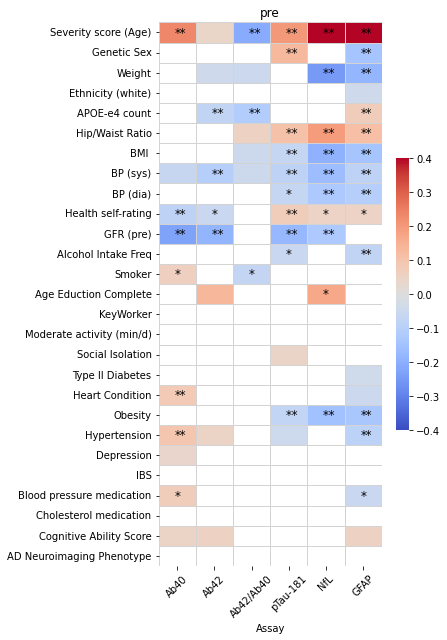

In [1256]:
for pp in ['pre']:#,'post',]: 
    
    assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    (table,pvals,pvals_corr,sigs,betas,r)=model_table(outpts_pre,[a + '_' + pp+'_cl' for a in SIMOA_assays],['simp'],vars['pre_comorb'],beta_dirs=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')

    table=table.rename(columns=cols_translate)
    table.T.style.format()
    tables['pre_int_'+pp]=table
    tables['pre_int_'+pp].T.to_excel('tables_test/within_int_'+pp+'.xlsx')
    rows=(pvals<1).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    # Create a mask for the p-values
    mask=((pvals.T)[rows,:]>0.2).astype(bool)

    # Set the figure size
    fig=plt.figure(figsize=(5,10))

    # Create the heatmap
    sns.heatmap(betas_in, annot=False, fmt=".2f", vmin=-0.4,vmax=0.4,mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


    
    # Set the x-axis and y-axis labels using cols_translate
    plt.yticks(np.arange(mask.shape[0])+.5, betas_in.index[rows], rotation=0)
    plt.xticks(np.arange(len(assays))+0.5,[a[:-6] for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()
    fig.savefig('tables_test/pre_int_'+pp+'.svg',dpi=300, bbox_inches = "tight")

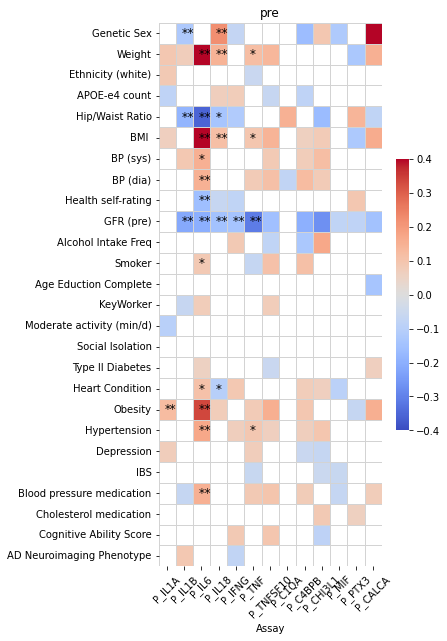

In [1257]:
for pp in ['pre']:#,'post',]: 
    
    assays = OLINK_assays_final # SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    
    (table,pvals,pvals_corr,sigs,betas,r)=model_table(outpts_pre,[a + '_' + pp+'_cl' for a in assays],['simp'],vars['pre_comorb'][1:],beta_dirs=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')

    table=table.rename(columns=cols_translate)
    table.T.style.format()
    tables['pre_int_'+pp]=table
    tables['pre_int_'+pp].T.to_excel('tables_test/within_int_'+pp+'_OLINK.xlsx')
    rows=(pvals<1).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    mask=((pvals.T)[rows,:]>0.2).astype(bool)

    # Set the figure size
    fig=plt.figure(figsize=(5,10))

    # Create the heatmap
    sns.heatmap(betas_in, annot=False, fmt=".2f", vmin=-0.4,vmax=0.4,mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


    
    # Set the x-axis and y-axis labels using cols_translate
    plt.yticks(np.arange(mask.shape[0])+.5, betas_in.index[rows], rotation=0)
    plt.xticks(np.arange(len(assays))+0.5,[a for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()
    fig.savefig('tables_test/pre_int_OLINK'+pp+'.svg',dpi=300, bbox_inches = "tight")


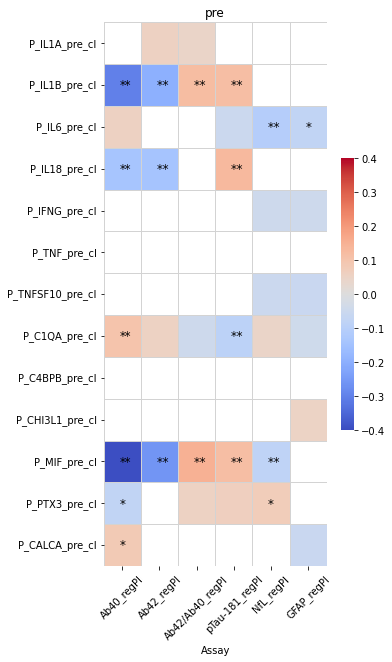

In [1283]:
# SIMOA OLINK
for pp in ['pre']: 
    
    assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    
    (table,pvals,pvals_corr,sigs,betas,r)=model_table(outpts_pre,[a + '_' + pp+'_cl' for a in assays],['simp'],vars['OLINK_pre'] ,beta_dirs=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')

    table=table.rename(columns=cols_translate)
    table.T.style.format()
    tables['pre_int_'+pp]=table
    tables['pre_int_'+pp].T.to_excel('tables_test/within_int_'+pp+'.xlsx')
    rows=(pvals<1).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    mask=((pvals.T)[rows,:]>0.2).astype(bool)

    # Set the figure size
    fig=plt.figure(figsize=(5,10))

    # Create the heatmap
    sns.heatmap(betas_in, annot=False, fmt=".2f", vmin=-0.4,vmax=0.4,mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


    
    # Set the x-axis and y-axis labels using cols_translate
    plt.yticks(np.arange(mask.shape[0])+.5, betas_in.index[rows], rotation=0)
    plt.xticks(np.arange(len(assays))+0.5,[a for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()
    fig.savefig('tables_test/pre_int_Simoa_OLINK_'+pp+'.svg',dpi=300, bbox_inches = "tight")

## Disease

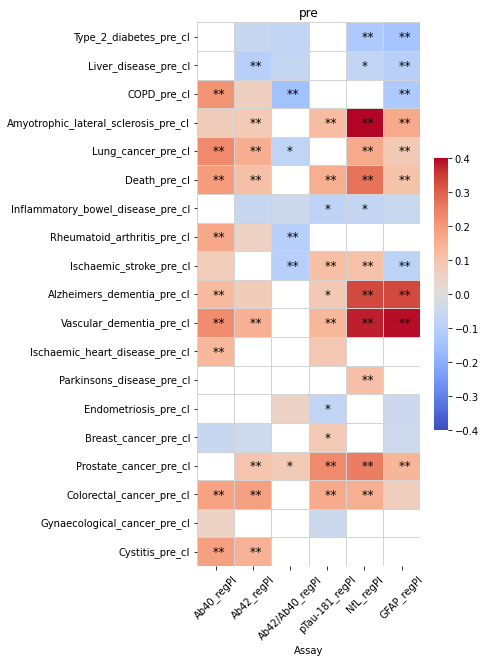

In [1261]:
for pp in ['pre']: 
    
    assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    
    (table,pvals,pvals_corr,sigs,betas,r)=model_table(outpts_pre,[a + '_' + pp+'_cl' for a in assays],['simp'],vars['diseases_pre'] ,beta_dirs=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')

    table=table.rename(columns=cols_translate)
    table.T.style.format()
    tables['pre_int_'+pp]=table
    tables['pre_int_'+pp].T.to_excel('tables_test/within_int_'+pp+'.xlsx')
    rows=(pvals<1).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    mask=((pvals.T)[rows,:]>0.2).astype(bool)

    # Set the figure size
    fig=plt.figure(figsize=(5,10))

    # Create the heatmap
    sns.heatmap(betas_in, annot=False, fmt=".2f", vmin=-0.4,vmax=0.4,mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


    
    # Set the x-axis and y-axis labels using cols_translate
    plt.yticks(np.arange(mask.shape[0])+.5, betas_in.index[rows], rotation=0)
    plt.xticks(np.arange(len(assays))+0.5,[a for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()
    fig.savefig('tables_test/pre_int_CA9_'+pp+'.svg',dpi=300, bbox_inches = "tight")

## AD Variants

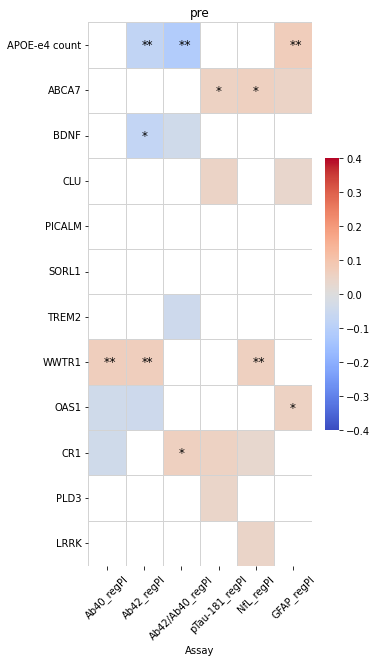

In [1270]:
for pp in ['pre']: 
    
    assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    
    (table,pvals,pvals_corr,sigs,betas,r)=model_table(outpts_pre,[a + '_' + pp+'_cl' for a in assays],['simp'],vars['AD_variants'] ,beta_dirs=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')

    table=table.rename(columns=cols_translate)
    table.T.style.format()
    tables['pre_int_'+pp]=table
    tables['pre_int_'+pp].T.to_excel('tables_test/within_int_'+pp+'.xlsx')
    rows=(pvals<1).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    mask=((pvals.T)[rows,:]>0.2).astype(bool)

    # Set the figure size
    fig=plt.figure(figsize=(5,10))

    # Create the heatmap
    sns.heatmap(betas_in, annot=False, fmt=".2f", vmin=-0.4,vmax=0.4,mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


    
    # Set the x-axis and y-axis labels using cols_translate
    plt.yticks(np.arange(mask.shape[0])+.5, betas_in.index[rows], rotation=0)
    plt.xticks(np.arange(len(assays))+0.5,[a for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()
    fig.savefig('tables_test/pre_int_CA9_'+pp+'.svg',dpi=300, bbox_inches = "tight")

## PRS

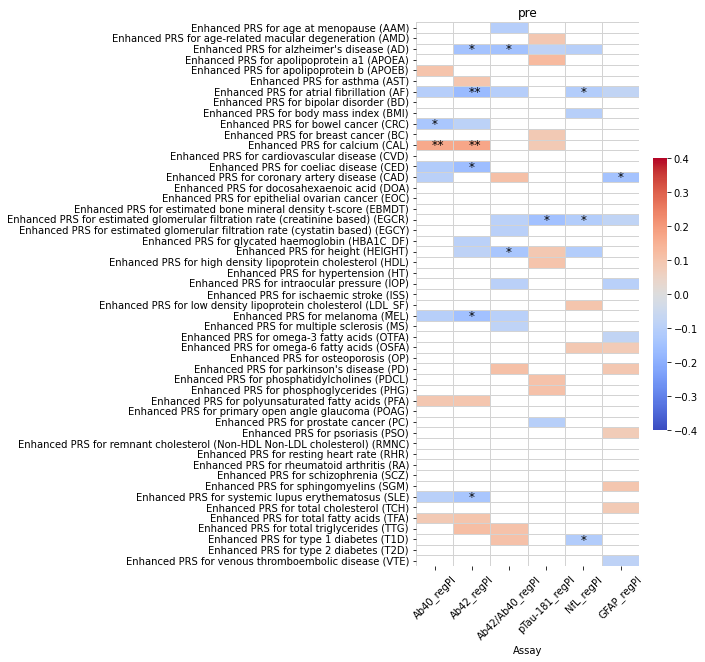

In [1271]:
for pp in ['pre']: 
    
    assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    
    (table,pvals,pvals_corr,sigs,betas,r)=model_table(outpts_pre,[a + '_' + pp+'_cl' for a in assays],['simp'],vars['PRS'] ,beta_dirs=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')

    table=table.rename(columns=cols_translate)
    table.T.style.format()
    tables['pre_int_'+pp]=table
    tables['pre_int_'+pp].T.to_excel('tables_test/within_int_'+pp+'.xlsx')
    rows=(pvals<1).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    mask=((pvals.T)[rows,:]>0.2).astype(bool)

    # Set the figure size
    fig=plt.figure(figsize=(5,10))

    # Create the heatmap
    sns.heatmap(betas_in, annot=False, fmt=".2f", vmin=-0.4,vmax=0.4,mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


    
    # Set the x-axis and y-axis labels using cols_translate
    plt.yticks(np.arange(mask.shape[0])+.5, (PRS[1].values), rotation=0)
    plt.xticks(np.arange(len(assays))+0.5,[a for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()
    fig.savefig('tables_test/pre_int_CA9_'+pp+'.svg',dpi=300, bbox_inches = "tight")

## Predicting  post from pre

In [147]:

assays_regPl=['Ab40_regPl',
 'Ab42_regPl',
 'Ab42/Ab40_regPl',
 'pTau-181_regPl',
 'NfL_regPl',
 'GFAP_regPl',
 'P_NEFL',
 'P_GFAP',
 'P_TREM2',
 'P_AXL',
 'P_TYRO3',
 'P_MIF',
 'P_C1QA',
 'P_C4BPB',
 'P_IL6',
 'P_IL18']


In [148]:
outpts={}

### Basic model results

In [471]:

outpts=calc_pre_post_models(data,all_matched,outpts, SIMOA_assays,data_ins=['simp'],models=['modpre'],inter_vars= vars['pre_comorb']+['adni_mean_pre_cl','cog_vars_gi_pre_cl','GeneralHealth_pre_cl'] + ['adni_mean_diff_cl','cog_vars_gi_diff_cl','GeneralHealth_diff_cl'] + ['vac_prior_first_pos'] + vars['OLINK_pre'] +    vars['diseases_pre'],a='post_cl',c='',ext='-3.0')


Ab40_regPl
Ab42_regPl
Ab42/Ab40_regPl
pTau-181_regPl
NfL_regPl
GFAP_regPl


In [339]:

model='_simp_modpre'
age_f=''
vars_show=['Case_bin','Age-3.0','22001-0.0','assessment_sep','assessment_sep^']

#model='modpre'
#outpts[IDP+age_f+data_in + '_' + model].pvalues/2
(table,pvals,pvals_corr,sigs,betas,resultst)=model_table(outpts,[a + '_post_cl' for a in SIMOA_assays],[model],vars_show,beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=False,FPR='col')
table=table.rename(columns=cols_translate)
table=table.T.rename(columns=cols_translate).T
table.style.format()

,n,Case/Control status,Age (pandemic),Genetic Sex,Assessment Interval (d),assessment_sep^
Assay,,,,,,
Ab40_regPl_p,1211,0.0216 (p=0.818),0.1686 (p=1.000),-0.0347 (p=0.074),0.0325 (p=0.593),0.0157 (p=0.545)
Ab42_regPl_p,1209,-0.0353 (p=0.054),0.0247 (p=0.864),-0.0341 (p=0.062),0.0636 (p=0.690),-0.0338 (p=0.396)
Ab42/Ab40_regPl_p,1196,-0.0601 (p=6.6e-04**),-0.0576 (p=0.002**),-0.0046 (p=0.404),0.0570 (p=0.700),-0.0663 (p=0.271)
pTau-181_regPl_p,1162,-0.0099 (p=0.658),0.1375 (p=3.5e-08**),0.0984 (p=3.6e-05**),0.3086 (p=0.014*),-0.3093 (p=0.986)
NfL_regPl_p,1156,-0.0086 (p=0.686),0.1093 (p=8.9e-08**),-0.0239 (p=0.909),0.1455 (p=0.076),-0.0881 (p=0.808)
GFAP_regPl_p,1156,-0.0079 (p=0.638),0.1398 (p=5.9e-13**),-0.0607 (p=4.5e-04**),0.1401 (p=0.147),-0.1496 (p=0.121)


In [486]:
table=model_table(outpts,assays_regPl[:6],['_post_cl_simp_modpre'],['Case_bin','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/basic_model.xlsx')
table.style.format()

,n,Case/Control status,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein
Assay,,,,,,,
Aβ40,1211,0.0216 (p=0.182),-0.0347 (p=0.148),0.1686 (p=2.1e-11**),0.0325 (p=0.815),0.0157 (p=0.910),0.5052 (p=7.4e-82**)
Aβ42,1217,-0.0352 (p=0.057),-0.0322 (p=0.152),0.0285 (p=0.211),0.0534 (p=0.682),-0.0149 (p=0.909),0.6286 (p=2.1e-135**)
Aβ42/Aβ40,1196,-0.0601 (p=6.6e-04**),-0.0046 (p=0.809),-0.0576 (p=0.003**),0.0570 (p=0.600),-0.0663 (p=0.541),0.7441 (p=5.8e-213**)
pTau-181,1195,-0.0092 (p=0.648),0.1007 (p=5.0e-05**),0.1433 (p=1.9e-08**),0.2723 (p=0.056),-0.2747 (p=0.053),0.4758 (p=6.9e-69**)
NfL,1219,-0.0053 (p=0.620),-0.0228 (p=0.191),0.1193 (p=5.6e-09**),0.1752 (p=0.083),-0.1177 (p=0.243),0.7401 (p=8.0e-200**)
GFAP,1223,-0.0042 (p=0.601),-0.0573 (p=6.4e-04**),0.1408 (p=8.1e-14**),0.1583 (p=0.099),-0.1592 (p=0.096),0.7468 (p=1.1e-229**)


In [390]:
### Results table

(table,pvals,pvals_corr,sigs,betas,resultstable)=model_table(outpts,assays_regPl[:6],['_post_cl_simp_modpre'],['Case_bin','Age-3.0','22001-0.0','assessment_sep'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.style.format()
#table.to_excel('tables_test/basic_model.xlsx')
table.style.format()

,n,Case/Control status,Age (y),Genetic Sex,Assessment Interval (d)
Assay,,,,,
Aβ40,1211,0.0216 (p=0.182),0.1686 (p=2.1e-11**),-0.0347 (p=0.148),0.0325 (p=0.815)
Aβ42,1209,-0.0353 (p=0.054),0.0247 (p=0.272),-0.0341 (p=0.125),0.0636 (p=0.621)
Aβ42/Aβ40,1196,-0.0601 (p=6.6e-04**),-0.0576 (p=0.003**),-0.0046 (p=0.809),0.0570 (p=0.600)
pTau-181,1162,-0.0099 (p=0.658),0.1375 (p=7.1e-08**),0.0984 (p=7.3e-05**),0.3086 (p=0.029**)
NfL,1156,-0.0086 (p=0.686),0.1093 (p=1.8e-07**),-0.0239 (p=0.181),0.1455 (p=0.152)
GFAP,1156,-0.0079 (p=0.681),0.1398 (p=5.9e-13**),-0.0607 (p=4.5e-04**),0.1401 (p=0.147)


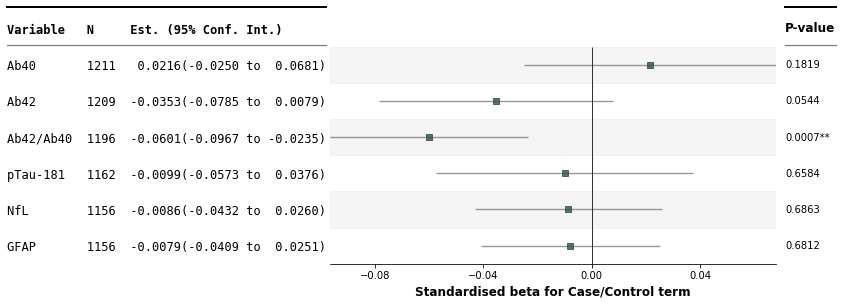

In [391]:
ff=fp.forestplot(resultstable['Case_bin'],  # the dataframe with results data
              estimate="betas_norm",  # col containing estimated effect size 
              ll="ci_l_norm", hl="ci_u_norm",  # columns containing conf. int. lower and higher limits
              varlabel="Assay",  # column containing variable label
             
                            
              pval='pvals',
                 starpval=True,
                 thresholds=[0.02,0.05],
                 symbols=['**','*'],
              annote=["n", "est_ci"],
              decimal_precision=4,
              annoteheaders=["N", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              #ylabel="Confidence interval",  # y-label title
              xlabel="Standardised beta for Case/Control term",  # x-label title
              table=True,
              color_alt_rows=True,figsize=(8,4.5),kwargs={"xlinecolor": ".5"})
offset=0.3
ff.set_ylim((ff.get_ylim()[0], ff.get_ylim()[1]+offset))
fig=plt.gcf()
fig.savefig('tables_test/basic_fig.svg', format="svg",dpi=300, bbox_inches = "tight")

### Percentage change hospitalisation vs non-hospitalisation and Lateral-Flow exclusion

In [392]:
outpts['Ab42/Ab40_regPl_post_cl_simp_modpre_hosp_only'].params

Intercept                      2.290562e-02
Q('Ab42/Ab40_regPl_pre_cl')    7.303970e-01
Q('Age-3.0')                  -1.070804e-04
Q('22001-0.0')                -1.189786e-04
Q('assessment_sep')            1.345223e-06
Q('assessment_sep^2')         -5.329747e-10
Case_hosp_bin_only            -4.146585e-03
Case_nohosp_bin_only          -1.479144e-03
dtype: float64

In [393]:
-5.482921793487978*(-1.479144e-03/-4.146585e-03)

-1.9558337459154898

In [394]:
outpts['Ab42/Ab40_regPl_post_cl_simp_modpre_hosp_only'].pc

-5.482921793487978

In [395]:
model='_simp_modpre_hosp_only'
age_f=''
vars_show=['Case_no','Case_hosp','Age-3.0','22001-0.0','assessment_sep','assessment_sep^']

#model='modpre'
#outpts[IDP+age_f+data_in + '_' + model].pvalues/2
(table,pvals,pvals_corr,sigs,betas,resultst)=model_table(outpts,[a + '_post_cl' for a in SIMOA_assays],[model],vars_show,beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=False,FPR='col')
table=table.rename(columns=cols_translate)
table=table.T.rename(columns=cols_translate).T
table.to_excel('tables_test/basic_hosp.xlsx')
table.style.format()

,n,Case_no,Case_hosp,Age (pandemic),Genetic Sex,Assessment Interval (d),assessment_sep^
Assay,,,,,,,
Ab40_regPl_p,1211,0.0234 (p=0.838),-0.0082 (p=0.365),0.1687 (p=1.000),-0.0347 (p=0.074),0.0327 (p=0.593),0.0155 (p=0.545)
Ab42_regPl_p,1209,-0.0322 (p=0.072),-0.0200 (p=0.181),0.0247 (p=0.864),-0.0341 (p=0.062),0.0638 (p=0.690),-0.0340 (p=0.395)
Ab42/Ab40_regPl_p,1196,-0.0557 (p=0.001**),-0.0290 (p=0.060),-0.0575 (p=0.002**),-0.0045 (p=0.405),0.0572 (p=0.701),-0.0665 (p=0.270)
pTau-181_regPl_p,1162,-0.0163 (p=0.750),0.0331 (p=0.086),0.1371 (p=3.8e-08**),0.0981 (p=3.8e-05**),0.3100 (p=0.014*),-0.3107 (p=0.986)
NfL_regPl_p,1156,-0.0136 (p=0.779),0.0258 (p=0.072),0.1090 (p=9.4e-08**),-0.0238 (p=0.909),0.1454 (p=0.076),-0.0879 (p=0.808)
GFAP_regPl_p,1156,-0.0098 (p=0.559),0.0093 (p=0.581),0.1398 (p=6.0e-13**),-0.0607 (p=4.5e-04**),0.1399 (p=0.147),-0.1495 (p=0.121)


In [397]:
# Include only those with  PCR
#outpts=calc_pre_post_models(data,all_matched,outpts, SIMOA_assays,data_ins=['simp'],models=['modpre'],inter_vars= vars['pre_comorb']+['adni_mean_diff_cl','cog_vars_gi_diff_cl','GeneralHealth_diff_cl'] + ['vac_prior_first_pos'] + vars['OLINK_pre'] +    vars['diseases_pre'],a='post_cl',c='',ext='-3.0')

outpts=calc_pre_post_models(data,all_matched,outpts, SIMOA_assays,data_ins=['PCR'],models=['modpre'],inter_vars= [],a='post_cl',c='',ext='-3.0')


Ab40_regPl
614
614
Ab42_regPl
617
617
Ab42/Ab40_regPl
606
606
pTau-181_regPl
606
606
NfL_regPl
618
618
GFAP_regPl
620
620


In [398]:

model='_PCR_modpre'
age_f=''
vars_show=['Case_bin','Age-3.0','22001-0.0','assessment_sep','assessment_sep^']

#model='modpre'
#outpts[IDP+age_f+data_in + '_' + model].pvalues/2
(table,pvals,pvals_corr,sigs,betas,resultst)=model_table(outpts,[a + '_post_cl' for a in SIMOA_assays],[model],vars_show,beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=False,FPR='col')
table=table.rename(columns=cols_translate)
table=table.T.rename(columns=cols_translate).T
table.to_excel('tables_test/basic_PCR.xlsx')
table.style.format()

,n,Case/Control status,Age (pandemic),Genetic Sex,Assessment Interval (d),assessment_sep^
Assay,,,,,,
Ab40_regPl_p,903,0.0301 (p=0.862),0.1611 (p=1.000),-0.0306 (p=0.136),-0.0059 (p=0.486),0.0516 (p=0.625)
Ab42_regPl_p,907,-0.0167 (p=0.261),0.0244 (p=0.821),-0.0296 (p=0.129),-0.0376 (p=0.403),0.0748 (p=0.687)
Ab42/Ab40_regPl_p,888,-0.0730 (p=4.9e-04**),-0.0781 (p=3.9e-04**),-0.0054 (p=0.404),0.0132 (p=0.541),-0.0425 (p=0.370)
pTau-181_regPl_p,888,-0.0274 (p=0.835),0.1603 (p=2.9e-08**),0.1050 (p=1.2e-04**),0.2250 (p=0.085),-0.2347 (p=0.924)
NfL_regPl_p,909,0.0150 (p=0.216),0.1005 (p=4.3e-06**),-0.0234 (p=0.889),0.1827 (p=0.049*),-0.1442 (p=0.904)
GFAP_regPl_p,910,-0.0115 (p=0.545),0.1329 (p=1.1e-09**),-0.0405 (p=0.036*),0.1134 (p=0.309),-0.1193 (p=0.283)


### Age-Related Vulnerabililty

In [644]:
### Results table Age-related vulnerability

(table,pvals,pvals_corr,sigs,betas,resultstable_age_f)=model_table(outpts,assays_regPl[:6],['_post_cl_age_f_simp_modpre'],['Case_bin','Age-3.0','Case_bin:','22001-0.0','assessment_sep','pre'],beta_dirs=[-1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age-Related Vulnerability'})
table=table.rename(columns={'Case_bin:':'ARV : Case/Control status'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.style.format()
table.to_excel('tables_test/basic_model_age_f.xlsx')
table.style.format()

,n,Case/Control status,Age-Related Vulnerability,ARV : Case/Control status,Genetic Sex,Assessment Interval (d),Baseline protein
Assay,,,,,,,
Aβ40,1211,0.0534 (p=0.947),0.2037 (p=5.5e-09**),-0.0570 (p=0.081),-0.0391 (p=0.105),0.0660 (p=0.635),0.5014 (p=4.7e-80**)
Aβ42,1217,0.0053 (p=0.568),0.0711 (p=0.026*),-0.0719 (p=0.030*),-0.0331 (p=0.141),0.0598 (p=0.647),0.6281 (p=4.0e-135**)
Aβ42/Aβ40,1196,-0.0541 (p=0.019*),-0.0517 (p=0.057),-0.0105 (p=0.372),-0.0033 (p=0.861),0.0454 (p=0.677),0.7449 (p=3.2e-214**)
pTau-181,1195,-0.0592 (p=0.961),0.1041 (p=0.003**),0.0881 (p=0.017**),0.0960 (p=1.1e-04**),0.3041 (p=0.032**),0.4750 (p=2.1e-69**)
NfL,1219,-0.0265 (p=0.864),0.0854 (p=0.001**),0.0383 (p=0.099),-0.0244 (p=0.164),0.1954 (p=0.054),0.7524 (p=2.9e-213**)
GFAP,1223,-0.0049 (p=0.584),0.1173 (p=2.9e-06**),0.0015 (p=0.478),-0.0559 (p=9.9e-04**),0.1727 (p=0.074),0.7609 (p=9.8e-239**)


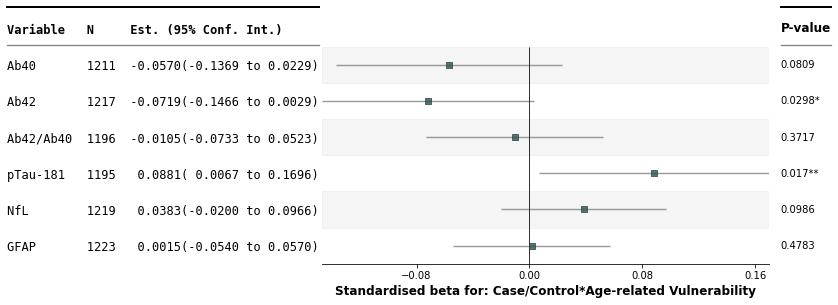

In [645]:
ff=fp.forestplot(resultstable_age_f['Case_bin:'],  # the dataframe with results data
              estimate="betas_norm",  # col containing estimated effect size 
              ll="ci_l_norm", hl="ci_u_norm",  # columns containing conf. int. lower and higher limits
              varlabel="Assay",  # column containing variable label
              pval='pvals',
                 starpval=True,
                 thresholds=[0.02,0.05],
                 symbols=['**','*'],
              decimal_precision=4,
              annote=["n", "est_ci"],
              annoteheaders=["N", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              #ylabel="Confidence interval",  # y-label title
              xlabel="Standardised beta for: Case/Control*Age-related Vulnerability",  # x-label title
              table=True,
              color_alt_rows=True,figsize=(8,4.5),kwargs={"xlinecolor": ".5"})
offset=0.3
ff.set_ylim((ff.get_ylim()[0], ff.get_ylim()[1]+offset))
#plt.show()
fig=plt.gcf()
fig.savefig('tables_test/age_f_fig.svg', format="svg",dpi=300, bbox_inches = "tight")

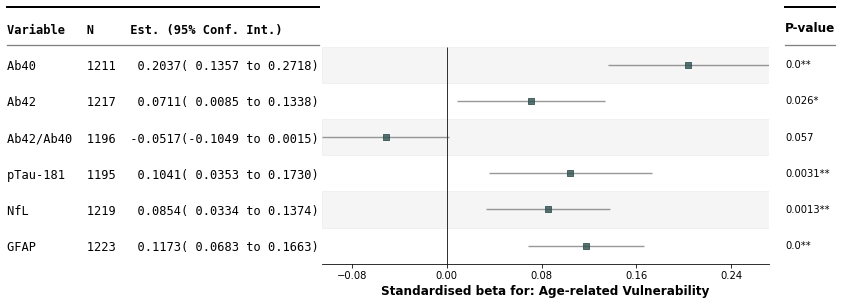

In [643]:
ff=fp.forestplot(resultstable_age_f['Age-3.0'],  # the dataframe with results data
              estimate="betas_norm",  # col containing estimated effect size 
              ll="ci_l_norm", hl="ci_u_norm",  # columns containing conf. int. lower and higher limits
              varlabel="Assay",  # column containing variable label
                 thresholds=[0.02,0.05],
                 symbols=['**','*'],
              pval='pvals',
              annote=["n", "est_ci"],
              annoteheaders=["N", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              #ylabel="Confidence interval",  # y-label title
              xlabel="Standardised beta for: Age-related Vulnerability",  # x-label title
              table=True,
              decimal_precision=4,
              color_alt_rows=True,figsize=(8,4.5),kwargs={"xlinecolor": ".5"})
offset=0.3
ff.set_ylim((ff.get_ylim()[0], ff.get_ylim()[1]+offset))

fig=plt.gcf()
fig.savefig('tables_test/age_f_age_fig.svg', format="svg",dpi=300, bbox_inches = "tight")

In [403]:

model='_PCR_modpre'
age_f='_age_f'
vars_show=['Case_bin','Case_bin:','Age-3.0','22001-0.0','assessment_sep','assessment_sep^']

#model='modpre'
#outpts[IDP+age_f+data_in + '_' + model].pvalues/2
(table,pvals,pvals_corr,sigs,betas,resultst)=model_table(outpts,[a + '_post_cl' for a in SIMOA_assays],[age_f +  model],vars_show,beta_dirs=[-1,-1,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=False,FPR='col')
table=table.rename(columns=cols_translate)
table=table.T.rename(columns=cols_translate).T
table.to_excel('tables_test/basic_PCR_age_f.xlsx')
table.style.format()

,n,Case/Control status,ARV : Case/Control status,Age (pandemic),Genetic Sex,Assessment Interval (d),assessment_sep^
Assay,,,,,,,
Ab40_regPl_p,903,0.0709 (p=0.968),-0.0747 (p=0.059),0.2061 (p=1.000),-0.0338 (p=0.113),0.0203 (p=0.550),0.0254 (p=0.562)
Ab42_regPl_p,907,0.0305 (p=0.802),-0.0846 (p=0.029*),0.0758 (p=0.978),-0.0322 (p=0.110),-0.0273 (p=0.430),0.0655 (p=0.665)
Ab42/Ab40_regPl_p,888,-0.0751 (p=0.007**),0.0051 (p=0.553),-0.0760 (p=0.011**),-0.0054 (p=0.405),0.0040 (p=0.513),-0.0325 (p=0.400)
pTau-181_regPl_p,888,-0.0842 (p=0.985),0.1013 (p=0.017*),0.1106 (p=0.003**),0.1024 (p=1.7e-04**),0.2604 (p=0.056),-0.2707 (p=0.951)
NfL_regPl_p,909,0.0135 (p=0.304),0.0033 (p=0.460),0.0858 (p=0.002**),-0.0240 (p=0.894),0.2009 (p=0.035*),-0.1630 (p=0.929)
GFAP_regPl_p,910,-0.0144 (p=0.707),0.0045 (p=0.445),0.1124 (p=5.5e-05**),-0.0395 (p=0.979),0.1225 (p=0.137),-0.1318 (p=0.881)


### example differences for 75 yo

In [405]:
# example differences for 75 yo

IDP='pTau-181_regPl_post_cl'
age_f=''
model='modpre'
data_in='simp'

# model settings
BL=0.075
age=75
BMI=25
gap=4*365
sex=1

m_case=(outpts[IDP+'_'+age_f+data_in + '_' + model].params*np.array([1,BL,age,sex,gap,gap**2,1])).sum()
m_control=(outpts[IDP+'_'+age_f+data_in + '_' + model].params*np.array([1,BL,age,sex,gap,gap**2,0])).sum()

# empirical % difference
print(100*(m_case-m_control)/0.075)
# modelled difference
print(outpts[IDP+'_'+age_f+data_in + '_' + model].pc)
print("Modelled Control")
print(100*(0.075-m_control)/0.075)
print("Modelled Case")
print(100*(0.075-m_case)/0.075)

-9.795671372654063
-1.1299492838047225
Modelled Control
-503.89453294774665
Modelled Case
-494.0988615750925


In [406]:
# example differences for 75 yo

IDP='Ab40_regPl'

model='modpre'
data_in='simp'



model_diffs={}
model_vals={}

for IDP in assays_regPl[:6]:
    

    # model settings for average participant
    # Baseline value
    age=75
    els= all_matched & ((data.loc[:,'Age-3.0']-age).abs()<2) & (data.loc[:,'22001-0.0']==0)
    BL=data.loc[els,IDP+'_pre_cl'].mean()
    dm=10**(data.loc[:,'Age-3.0']*0.0524-3.27)
    age_f_val=(10**(age*0.0524-3.27))/np.mean(dm)
    # 4 year gap between pre and post
    gap=4*365
    sex=0

    for age_f in ['','age_f_']:

        for cc in [0,1]:
            if cc==0:
                case='_control'
            else:   
                case='_case'

            if age_f == '':
                betas = np.array([1,BL,age,sex,gap,gap**2,cc]) 
            else:
                betas = np.array([1,BL,age_f_val,sex,gap,gap**2,cc,cc*age_f_val])

            model_vals[IDP+age_f+case]=(outpts[IDP+'_post_cl_'+age_f+data_in + '_' + model].params*betas).sum()

        m_case=model_vals[IDP+age_f+'_case']
        m_control=model_vals[IDP+age_f+'_control']

        # empirical % difference

        model_diffs[IDP+'_'+age_f+'pc'] = (100*(m_case-m_control)/m_control)
    
        # # modelled difference
        # print(outpts[IDP+'_post_cl'+'_'+age_f+data_in + '_' + model].pc)
        # print("Modelled Control")
        # print(100*(BL-m_control)/BL)
        # print("Modelled Case")
        # print(100*(BL-m_case)/BL)

In [407]:
model_diffs

{'Ab40_regPl_pc': 0.7586610119779659,
 'Ab40_regPl_age_f_pc': -1.2000945537174428,
 'Ab42_regPl_pc': -1.5777512202165074,
 'Ab42_regPl_age_f_pc': -4.750741086009692,
 'Ab42/Ab40_regPl_pc': -2.3289626043751976,
 'Ab42/Ab40_regPl_age_f_pc': -2.7169261017925783,
 'pTau-181_regPl_pc': -1.0144884480616874,
 'pTau-181_regPl_age_f_pc': 8.495766618444305,
 'NfL_regPl_pc': -0.22807625760268063,
 'NfL_regPl_age_f_pc': 1.0667300174557774,
 'GFAP_regPl_pc': -0.14095231857127813,
 'GFAP_regPl_age_f_pc': 0.06598128316028995}

In [408]:
age_f_val

2.6607734189268126

In [409]:
ii=np.abs(data.loc[:,'Age-3.0']-75).argmin()
data.loc[:,'Age-3.0_f'].values[ii]

2.6651748201763574

In [410]:
data.loc[all_matched,'Ab42_regPl_pre_cl'].mean()

6.46483201574957

### Interactions 

In [411]:
# vars_show=['Case_bin',"Q('Age-3.0')","Q('assessment_sep')","Q('Hip/Waist-2.0')","C(Q('Diabetes2'))[T.True]"]
# (table,pvals,pvals_corr,sigs,betas)=model_table(outpts,[a + '_cl' for a in assays],['_modpre_age_f_riskfactors'],vars_show,beta_name_add=beta_name,beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=False,FPR='col')
# table=table.rename(columns=cols_translate)
# table=table.T.rename(columns=cols_translate).T
# table.T.style.format()

In [412]:
IDP='pTau-181_regPl_post_cl'
IDP='Ab42/Ab40_regPl_post_cl'
outpts[IDP+'_simp_modpre'].pc

-2.074513645699812

In [413]:
# Example model

IDP='Ab42/Ab40_regPl_post_cl'
age_f=''
model='modpre'
data_in='simp'

# model settings
BL=0.075
age=75
BMI=25
gap=4*365
sex=1

m_case=(outpts[IDP+'_'+age_f+data_in + '_' + model].params*np.array([1,BL,age,sex,gap,gap**2,+0.5])).sum()
m_control=(outpts[IDP+'_'+age_f+data_in + '_' + model].params*np.array([1,BL,age,sex,gap,gap**2,-0.5])).sum()

# modelled % difference
print(100*(m_case-m_control)/0.075)
print("Modelled Control")
print(100*(0.075-m_control)/0.075)
print("Modelled Case")
print(100*(0.075-m_case)/0.075)

-2.0918646538643135
Modelled Control
4.093224278431636
Modelled Case
6.185088932295949


In [414]:
(-1.108086e-07*365)/-1.712936e-03

0.023611587940238283

In [415]:
IDP='Ab42/Ab40_regPl_post_cl'
age_f=''
model='modpre'
data_in='simp'
outpts[IDP+'_'+age_f+data_in + '_' + model].pvalues/2


Intercept                       8.815115e-12
Q('Ab42/Ab40_regPl_pre_cl')    2.876061e-213
Q('Age-3.0')                    1.711795e-03
Q('22001-0.0')                  4.044117e-01
Q('assessment_sep')             2.999180e-01
Q('assessment_sep^2')           2.705289e-01
Case_bin                        6.590327e-04
dtype: float64

In [416]:
mean_assess_sep=data.loc[all_matched,'assessment_sep'].mean()

In [417]:
mean_pre=data.loc[all_matched,'Ab42/Ab40_regPl_pre_cl'].mean()

In [418]:
 no_case_effect=2.412239e-02+0.0755620358816737*7.331141e-01 + 70*(-1.010822e-04) -2.130467e-04 - 1179*(2.001884e-07)

In [419]:
mean_pre/(no_case_effect)

1.049572413836087

In [420]:
mean_pre/(no_case_effect-1.556185e-03)

1.0727609284078714

In [421]:
# percentage change with Case
IDP='Ab42/Ab40_regPl_post_cl'
a='Case_bin'
case="Q('" + a + "')"
print('PC for simple model: ' + str(outpts[IDP+'_simp_modpre'].pc))
#print(outpts_pre[IDP+'_'+a+'_simp'].pvalues)
#print('PC for ext model: ' + str(outpts[IDP+'_simp_modpre_ext'].pc))
#print(outpts_pre[IDP+'_simp'].pvalues)

PC for simple model: -2.074513645699812


### Change heatmaps

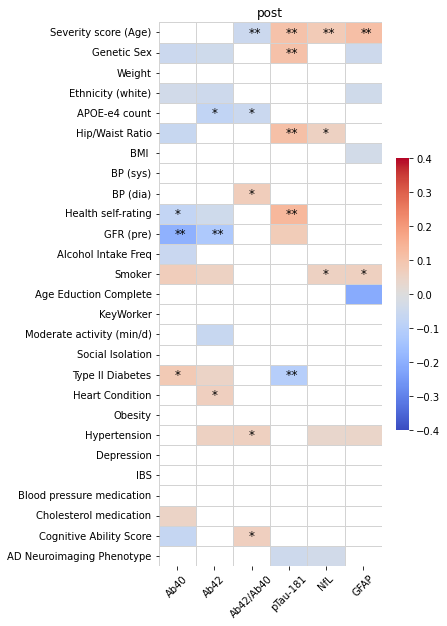

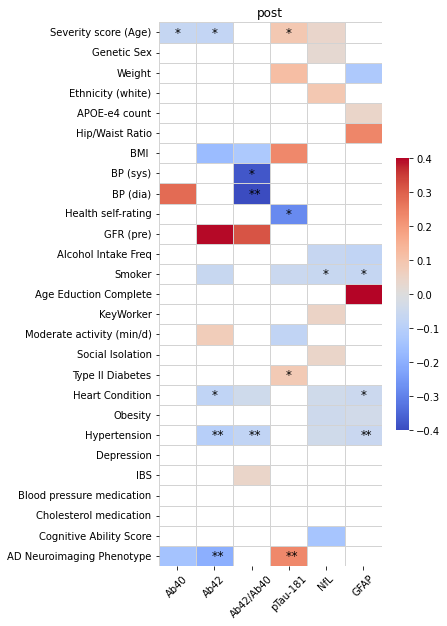

Text(0.5, 1.0, 'post')

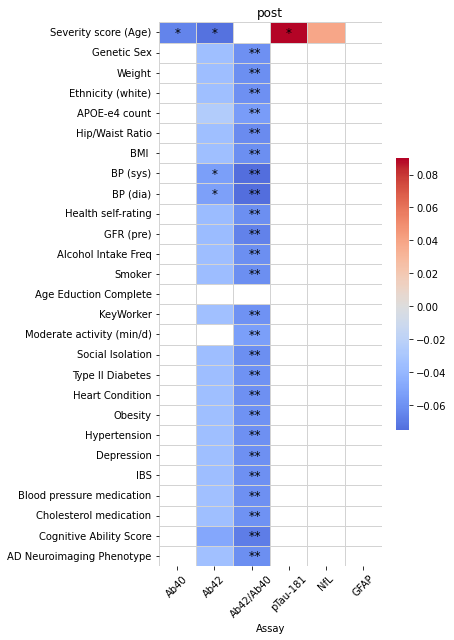

In [490]:

pp='post'
vars_show=vars['pre_comorb']


for beta_name in ['','Case']:
    assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    (table,pvals,pvals_corr,sigs,betas,sdf)=model_table(outpts,[a + '_' + pp+'_cl' for a in assays],['int_simp_modpre'],vars_show,beta_name_add=beta_name,beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')

    table=table.rename(columns=cols_translate)
    table=table.T.rename(columns=cols_translate).T
    table.index=[a[:-6] for a in assays]
    table.T.style.format()
    tables['pre_int_'+beta_name]=table.T
    table.T.to_excel('tables_test/post_int_'+beta_name+'.xlsx')
    
    rows=(pvals<1).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    #     ccs=data.loc[all_matched,[a+'_pre_cl' for a in assays]+vars_show].corr().iloc[6:,:6]
    #     ccs=ccs.rename(index=cols_translate)
    #     ccs_good_labels=ccs.index[rows]
    #     ccs_good=ccs.values[rows]
    #     ccs_good.shape
    mask=((pvals.T)[rows,:]>0.2).astype(bool)


    # Set the figure size
    fig=plt.figure(figsize=(5,10))

    # Create the heatmap
    plot=sns.heatmap(betas_in, annot=False, vmin=-0.4,vmax=0.4,fmt=".2f", mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


#     for i in np.arange(6):

#         for j in range(mask.shape[0]):
#             if sigs[:,rows][i,j] == 1:
#                 plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    # Set the x-axis and y-axis labels using cols_translate
    plt.yticks(np.arange(mask.shape[0])+.5, betas_in.index[rows], rotation=0)
    plt.xticks(np.arange(len(assays))+0.5,[a[:-6] for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()
    #ff=plt.gcf()
    fig.savefig('tables_test/post_int_'+beta_name+'.svg',dpi=300, bbox_inches = "tight")

(table,pvals,pvals_corr,sigs,betas,sdf)=model_table(outpts,[a + '_' + pp+'_cl' for a in assays],['conf_simp_modpre'],vars_show,beta_name_only='Case_bin',beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='row')
table=table.rename(columns=cols_translate)
table=table.T.rename(columns=cols_translate).T
table.T.style.format()
tables['pre_conf']=table

rows=(pvals<1).sum(axis=0)>0
betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
betas_in=betas_in.iloc[:,rows].T

mask=((pvals.T)[rows,:]>0.2).astype(bool)

# Set the figure size
plt.figure(figsize=(5,10))

# Create the heatmap
sns.heatmap(betas_in, annot=False, fmt=".2f", mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

for i in range(6):
    for j in range(mask.shape[0]):
        if pvals[:,rows][i,j] <0.05:
            plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

for i in range(6):
    for j in range(mask.shape[0]):
        if sigs[:,rows][i,j] == 1:
            plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)
#Set the x-axis and y-axis labels using cols_translate
plt.yticks(np.arange(mask.shape[0])+.5, betas_in.index[rows], rotation=0)
plt.xticks(np.arange(len(assays))+0.5,[a[:-6] for a in assays],rotation=45)

# Set the title
plt.title(pp)

# Show the plot
#out=plt.show()
#ff=plt.gcf()
#ff.savefig('tables_test/test.pdf')

In [423]:
(table,pvals,pvals_corr,sigs,betas,sdf)=model_table(outpts,[a + '_' + pp+'_cl' for a in assays],['int_simp_modpre'],vars_show,beta_name_add='',beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')
table

,n,Age-2.0_f,22001-0.0,21002-2.0,Ethnicity(White),APOE_score,Hip/Waist-2.0,21001-2.0,4080-2.0,4079-2.0,...,Diabetes2,Heart_Cond,Obesity-2.0,hypertension,depression,IBS,BP_meds,Chol_meds,cog_vars_gi-2.0,adni_mean_cl-2.0
Assay,,,,,,,,,,,,,,,,,,,,,
Ab40_regPl_p,1194,0.2038 (p=1.000),-0.0504 (p=0.068),0.0625 (p=0.953),-0.0351 (p=0.144),-0.0118 (p=0.381),-0.0612 (p=0.068),0.0543 (p=0.943),0.0009 (p=0.983),-0.0352 (p=0.365),...,0.0820 (p=0.019*),0.0392 (p=0.263),0.0228 (p=0.503),0.0332 (p=0.343),0.0042 (p=0.906),0.0367 (p=0.295),0.0380 (p=0.289),0.0488 (p=0.165),-0.0672 (p=0.095),0.0319 (p=0.344)
Ab42_regPl_p,1193,0.0654 (p=0.979),-0.0529 (p=0.045*),0.0229 (p=0.745),-0.0452 (p=0.069),-0.0838 (p=0.010*),-0.0200 (p=0.301),0.0236 (p=0.769),0.0135 (p=0.722),0.0119 (p=0.744),...,0.0486 (p=0.133),0.0564 (p=0.081),-0.0124 (p=0.695),0.0703 (p=0.029*),0.0024 (p=0.942),0.0041 (p=0.900),0.0425 (p=0.199),0.0229 (p=0.483),-0.0184 (p=0.618),0.0342 (p=0.271)
Ab42/Ab40_regPl_p,1180,-0.0520 (p=0.030**),0.0002 (p=0.503),-0.0187 (p=0.263),-0.0044 (p=0.432),-0.0546 (p=0.037*),0.0269 (p=0.796),-0.0181 (p=0.253),0.0206 (p=0.519),0.0716 (p=0.020*),...,-0.0284 (p=0.299),0.0336 (p=0.221),-0.0195 (p=0.466),0.0603 (p=0.027*),0.0001 (p=0.998),-0.0154 (p=0.572),0.0283 (p=0.312),-0.0170 (p=0.538),0.0656 (p=0.035*),0.0146 (p=0.582)
pTau-181_regPl_p,1146,0.1009 (p=0.002**),0.1137 (p=5.3e-04**),-0.0212 (p=0.712),-0.0257 (p=0.774),-0.0012 (p=0.512),0.0952 (p=0.012**),-0.0613 (p=0.962),-0.0739 (p=0.077),-0.0161 (p=0.688),...,-0.0763 (p=0.032*),0.0213 (p=0.551),-0.0399 (p=0.250),-0.0356 (p=0.316),0.0144 (p=0.690),-0.0161 (p=0.652),-0.0081 (p=0.825),-0.0367 (p=0.310),0.0318 (p=0.437),-0.0396 (p=0.250)
NfL_regPl_p,1141,0.0633 (p=0.011**),-0.0423 (p=0.954),-0.0538 (p=0.972),-0.0268 (p=0.859),0.0220 (p=0.226),0.0715 (p=0.011**),-0.0491 (p=0.972),0.0192 (p=0.534),0.0139 (p=0.636),...,0.0176 (p=0.498),0.0234 (p=0.369),0.0172 (p=0.496),0.0325 (p=0.209),-0.0316 (p=0.227),-0.0319 (p=0.220),0.0111 (p=0.673),0.0056 (p=0.831),0.0104 (p=0.729),-0.0343 (p=0.171)
GFAP_regPl_p,1141,0.1036 (p=7.9e-05**),-0.0480 (p=0.047*),-0.0407 (p=0.122),-0.0422 (p=0.077),0.0137 (p=0.618),0.0196 (p=0.502),-0.0405 (p=0.092),0.0279 (p=0.336),0.0015 (p=0.957),...,0.0015 (p=0.951),0.0225 (p=0.365),-0.0009 (p=0.971),0.0436 (p=0.077),0.0225 (p=0.366),-0.0126 (p=0.613),0.0182 (p=0.471),0.0014 (p=0.957),-0.0290 (p=0.325),-0.0225 (p=0.349)


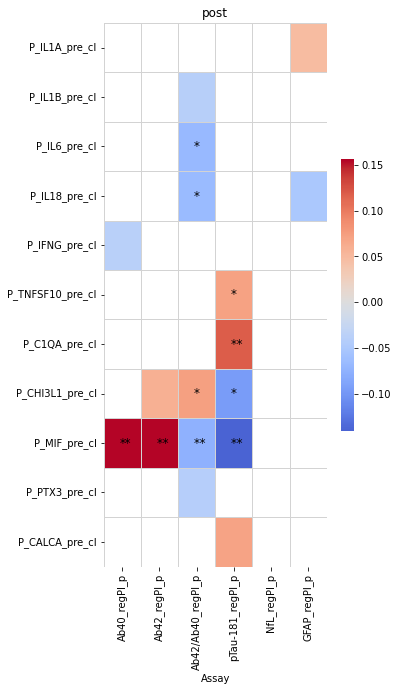

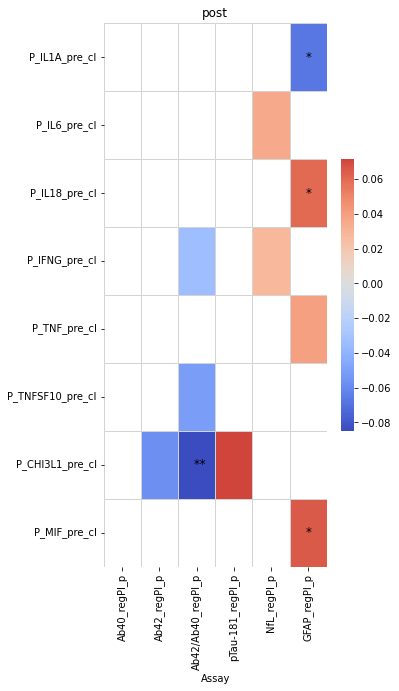

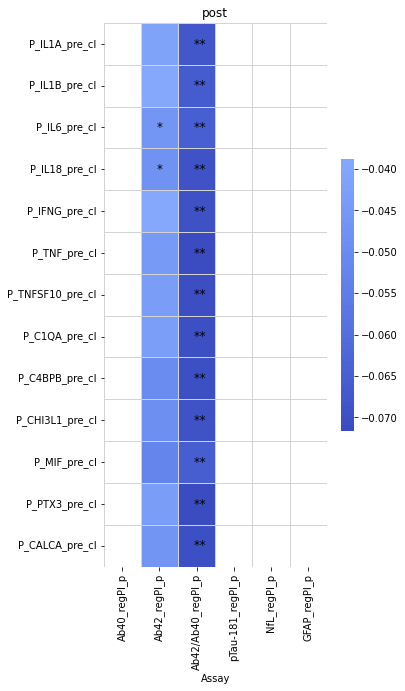

In [424]:
pp='post'
vars_show=vars['OLINK_pre']

for beta_name in ['','Case']:
    assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    (table,pvals,pvals_corr,sigs,betas,sdf)=model_table(outpts,[a + '_' + pp+'_cl' for a in assays],['int_simp_modpre'],vars_show,beta_name_add=beta_name,beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')
    table=table.rename(columns=cols_translate)
    table=table.T.rename(columns=cols_translate).T
    table.T.style.format()

    rows=(pvals<0.2).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    #els=(pvals<0.05)
    #ccs_good_labels=ccs.index[rows]
    #ccs_good=ccs.values[rows]
    #ccs_good.shape
    mask=((pvals.T)[rows,:]>0.2).astype(bool)


    # Set the figure size
    plt.figure(figsize=(5,10))

    # Create the heatmap
    sns.heatmap(betas_in, annot=False, fmt=".2f", mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


#     for i in np.arange(6):

#         for j in range(mask.shape[0]):
#             if sigs[:,rows][i,j] == 1:
#                 plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    # Set the x-axis and y-axis labels using cols_translate
    #plt.yticks(np.arange(mask.shape[0])+.5, ccs.index[rows], rotation=0)
    #plt.xticks(np.arange(len(assays))+0.5,[a[:-6] for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()

#vars_show=vars['pre']
assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
(table,pvals,pvals_corr,sigs,betas,sdf)=model_table(outpts,[a + '_' + pp+'_cl' for a in assays],['conf_simp_modpre'],vars_show,beta_name_only='Case_bin',beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')
table=table.rename(columns=cols_translate)
print   (table.T.style.format())
table=table.T.rename(columns=cols_translate).T
table.T.style.format()
#     ccs=data.loc[all_matched,[a+'_pre_cl' for a in assays]+vars_show].corr().iloc[6:,:6]
#     ccs=ccs.rename(index=cols_translate)

rows=(pvals<0.2).sum(axis=0)>0
betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
betas_in=betas_in.iloc[:,rows].T
#els=(pvals<0.05)
#ccs_good_labels=ccs.index[rows]
#ccs_good=ccs.values[rows]
#ccs_good.shape
mask=((pvals.T)[rows,:]>0.2).astype(bool)


# Set the figure size
plt.figure(figsize=(5,10))

# Create the heatmap
sns.heatmap(betas_in, annot=False, fmt=".2f", mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

for i in range(6):
    for j in range(mask.shape[0]):
        if pvals[:,rows][i,j] <0.05:
            plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

for i in range(6):
    for j in range(mask.shape[0]):
        if sigs[:,rows][i,j] == 1:
            plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


#     for i in np.arange(6):

#         for j in range(mask.shape[0]):
#             if sigs[:,rows][i,j] == 1:
#                 plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

# Set the x-axis and y-axis labels using cols_translate
#plt.yticks(np.arange(mask.shape[0])+.5, ccs.index[rows], rotation=0)
#plt.xticks(np.arange(len(assays))+0.5,[a[:-6] for a in assays],rotation=45)



# Set the title
plt.title(pp)

# Show the plot
plt.show()

In [ ]:
find_vars(data,'30680')
find_vars(data,'21104')
find_vars(data,'130778')
data['104670-0.0'].notna().sum()
calcium=['30680-0.0','']

251

In [425]:
# percent change calculations
IDPs=['Ab42/Ab40_regPl_pre_cl']


pc_stats=pd.DataFrame()

for IDP_base in [SIMOA_assays[2]]: 
    # pre-post change
    
    IDP=IDP_base+'_pre_cl'
    IDP_post=IDP_base+'_post_cl'
    els=all_matched
    els=all_case&(data.loc[:,IDP_pre].notnull())#&(data.loc[:,'Gender_pre']=='Female') #&(data['Diabetes']==False)&(data['BP_meds']==False)&(data['Heart_Cond']==False) #&(data.loc[:,'matched_age_mean']>60) #&elsA44 # & (data.loc[:,'COVID']=='COVID') #&(data.loc[:,'A4'].notna()) #(&&(data.loc[:,'matched_age_mean']>75) # &(data.loc[:,time].notnull())
    ids=data.loc[els,'matched_eid'].dropna().values
    ids=data.loc[ids,IDP_pre].notnull().index
    ids2=data.loc[ids,'matched_eid'].values
    idels=(data.loc[ids,'KeyWorker'].values==data.loc[ids,'KeyWorker'].values)#  & (data.loc[ids,'Diabetes'].values==data.loc[ids2,'Diabetes'].values)&  (data.loc[ids,'Chol_meds'].values==data.loc[ids2,'Chol_meds'].values)  & (data.loc[ids,'BP_meds'].values==data.loc[ids2,'BP_meds'].values) # & (np.abs((data.loc[ids,'709-2.0'].values-data.loc[ids2,'709-2.0'].values))<2) #& 
    idels=(ids==ids)
    els[:]=False
    els[ids[idels]]=True
    els[ids2[idels]]=True 
  
    # calculate percentage effect for A34 vs A33
    A3A3_m=data.loc[els&(data['APOE']=='A3A3'),IDP].mean()
    A3A4_m=data.loc[els&(data['APOE']=='A3A4'),IDP].mean()
    A4A4_m=data.loc[els&(data['APOE']=='A4A4'),IDP].mean()
    print('A33-A34 basic: ' + str(100*(A3A4_m-A3A3_m)/A3A3_m))
    print('A33-A44 basic: ' + str(100*(A4A4_m-A3A3_m)/A3A3_m))
    for b in ['Diabetes','Smoking_bin-2.0','22001-0.0','31-0.0','BP_meds','Chol_meds','Obesity-2.0']:
        
        A=data.loc[els&(data[b]==True),IDP].mean()
        B=data.loc[els&(data[b]==False),IDP].mean()

        print(b+ ' basic: ' + str(100*(A-B)/B))
    for b in ['Case']:
        A=data.loc[els&(data[b]=='sars'),IDP].mean()
        B=data.loc[els&(data[b]=='ctr'),IDP].mean()  
        print(b+ 'pre basic: ' + str(100*(A-B)/B))
    for b in ['Case']:
        A=data.loc[els&(data[b]=='sars'),re.sub('pre','post',IDP)].mean()
        B=data.loc[els&(data[b]=='ctr'),re.sub('pre','post',IDP)].mean()  
        print(b+ 'post basic: ' + str(100*(A-B)/B))
        
    #a='APOE'
    #print('APOE - model: ' +str(100*(outpts_pre[IDP+'_'+a+'_simp'].params["C(Q('APOE'))[T.A3A3]"]-outpts_pre[IDP+'_'+a+'_simp'].params["C(Q('APOE'))[T.A3A4]"])/data.loc[els,IDP].mean()))
    #outpts_pre[IDP+'_'+a+'_simp'].params

    # calculate percentage change for A34 vs A33

    IDP='Ab42/Ab40_regPl_post_cl'
    # raw
    A3A3_m=data.loc[els&(data['Case']=='ctr'),IDP].mean()
    A3A4_m=data.loc[els&(data['Case']=='sars'),IDP].mean()
    
    print(100*(A3A3_m-A3A4_m)/A3A3_m)

    # model based
    
    
    print('Case_bin - model')
    print(outpts[IDP+'_simp_modpre'].pc)

    print('APOE model 2')
    IDP='Ab42/Ab40_regPl_pre_cl'
    a='APOE'
    #print(100*(outpts_pre[IDP+'_'+a+'_simp'].params["C(Q('APOE'))[T.A3A3]"]-outpts_pre[IDP+'_'+a+'_simp'].params["C(Q('APOE'))[T.A3A4]"])/data.loc[els,IDP].mean())
    #outpts_pre[IDP+'_'+a+'_simp'].params

    # pc by age
    # Calculate aging effect
    a='Age-2.0'
    print('Aging per year')
    print(outpts_pre[IDP+'_'+a+'_simp'].pc)


    # pc for Case/Control

  
    #print(outpts_pre['Ab42/Ab40_regPl_pre_cl_Case_bin_simp_modpre'].pc)
    #print(outpts['Ab42/Ab40_regPl_post_cl_ext_modpre'].pc)

A33-A34 basic: -3.667992561442906
A33-A44 basic: -12.188395827695311
Diabetes basic: -2.578203000346062
Smoking_bin-2.0 basic: -5.461931885594838
22001-0.0 basic: -2.02842771214232
31-0.0 basic: -2.067236057839684
BP_meds basic: -2.842279550218115
Chol_meds basic: -2.6065754652933975
Obesity-2.0 basic: -0.8622574173975649
Casepre basic: -2.3550571671181992
Casepost basic: -3.6968730350085446
3.6968730350085446
Case_bin - model
-2.074513645699812
APOE model 2
Aging per year
-0.5202841806922764


In [426]:
IDP='Ab42/Ab40_regPl_pre_cl'
# pc by age
# Calculate aging effect
a='Age-2.0'
print('Aging per year')
print(outpts_pre[IDP+'_'+a+'_simp'].pc)

Aging per year
-0.5202841806922764


In [427]:
b='22001-0.0'
A=data.loc[all_matched&(data[b]==True),IDP].mean()
B=data.loc[all_matched&(data[b]==False),IDP].mean()
print(A)
print(B)

0.074751815172912
0.07635971611445043


### Inflammation tables

In [440]:
outpts=calc_pre_post_models(data,all_matched,outpts, OLINK_assays_final,data_ins=['simp'],models=['modpre'],inter_vars= ['adni_mean_diff_cl','cog_vars_gi_diff_cl','GeneralHealth_diff_cl'] + ['vac_prior_first_pos'] + vars['pre_comorb'],a='post_cl',c='',ext='-3.0')


P_IL1A
P_IL1B
P_IL6
P_IL18
P_IFNG
P_TNF
P_TNFSF10
P_C1QA
P_C4BPB
P_CHI3L1
P_MIF
P_PTX3
P_CALCA


In [489]:
# change across sessions

table=model_table(outpts, vars['OLINK_post'],['_simp_modpre'],['Case_bin','Age-3.0','22001-0.0','assessment_sep'],beta_dirs=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],FPR='col',alpha=0.05,rem_txt=9)
table=table.rename(columns=cols_translate)
table.index=[a[2:-8] for a in vars['OLINK_post']]
table.style.format()
tables['inflam_change_basic']=table
table.to_excel('tables_test/inflam_change_basic.xlsx')
table

,n,Case/Control status,Age (pandemic),Genetic Sex,Assessment Interval (d)
IL1A,452,-0.0591 (p=0.202),-0.0048 (p=0.921),-0.0271 (p=0.564),-0.5046 (p=0.072)
IL1B,466,-0.0807 (p=0.081),-0.0480 (p=0.314),-0.0104 (p=0.826),-0.4275 (p=0.134)
IL6,485,0.0119 (p=0.752),0.0828 (p=0.038*),0.0086 (p=0.821),0.4223 (p=0.064)
IL18,507,-0.0155 (p=0.628),-0.0104 (p=0.750),0.1726 (p=3.3e-07**),0.2255 (p=0.256)
IFNG,470,-0.0676 (p=0.127),0.0219 (p=0.634),-0.0770 (p=0.088),-0.0678 (p=0.801)
TNF,470,-0.0167 (p=0.699),0.0539 (p=0.230),-0.0004 (p=0.993),-0.1501 (p=0.563)
TNFSF10,521,-0.1055 (p=0.002**),-0.0822 (p=0.019*),-0.0263 (p=0.448),0.2927 (p=0.165)
C1QA,521,-0.0220 (p=0.449),0.0609 (p=0.043*),0.0229 (p=0.436),0.1424 (p=0.427)
C4BPB,501,-0.0035 (p=0.915),-0.0637 (p=0.060),-0.1451 (p=2.2e-05**),0.0681 (p=0.741)
CHI3L1,526,0.0352 (p=0.277),0.1430 (p=3.2e-05**),0.0416 (p=0.203),0.3763 (p=0.054)


In [442]:
# change across sessions hosp

table=model_table(outpts, vars['OLINK_post'],['_simp_modpre_hosp_only'],['Case_nohosp','Case_hosp','Age-3.0','22001-0.0','assessment_sep','pre'],beta_dirs=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],FPR='col',alpha=0.05,rem_txt=9)
table=table.rename(columns=cols_translate)
table.index=[a[2:-8] for a in vars['OLINK_post']]
table.style.format()
tables['inflam_change_basic']=table
table.to_excel('tables_test/inflam_change_basic_hosp.xlsx')
table

,n,Case_nohosp,Case_hosp,Age (pandemic),Genetic Sex,Assessment Interval (d),Baseline protein
IL1A,452,-0.0612 (p=0.187),0.0019 (p=0.967),-0.0049 (p=0.919),-0.0271 (p=0.565),-0.5081 (p=0.071),0.0890 (p=0.059)
IL1B,466,-0.0743 (p=0.109),-0.0368 (p=0.427),-0.0479 (p=0.316),-0.0103 (p=0.827),-0.4223 (p=0.139),0.0406 (p=0.408)
IL6,485,-0.0098 (p=0.794),0.0963 (p=0.010*),0.0823 (p=0.038*),0.0086 (p=0.820),0.4007 (p=0.078),0.5404 (p=5.9e-37**)
IL18,507,-0.0165 (p=0.607),0.0025 (p=0.937),-0.0105 (p=0.749),0.1727 (p=3.4e-07**),0.2244 (p=0.259),0.6413 (p=3.0e-62**)
IFNG,470,-0.0672 (p=0.130),-0.0094 (p=0.833),0.0219 (p=0.635),-0.0770 (p=0.089),-0.0692 (p=0.798),0.2778 (p=1.3e-09**)
TNF,470,-0.0213 (p=0.623),0.0189 (p=0.662),0.0539 (p=0.230),-0.0004 (p=0.993),-0.1549 (p=0.551),0.3237 (p=1.3e-12**)
TNFSF10,521,-0.1025 (p=0.003**),-0.0249 (p=0.469),-0.0822 (p=0.020*),-0.0263 (p=0.448),0.2930 (p=0.165),0.6192 (p=6.5e-56**)
C1QA,521,-0.0236 (p=0.417),0.0044 (p=0.879),0.0609 (p=0.044*),0.0229 (p=0.436),0.1408 (p=0.433),0.7384 (p=4.6e-91**)
C4BPB,501,-0.0076 (p=0.819),0.0169 (p=0.609),-0.0638 (p=0.059),-0.1451 (p=2.3e-05**),0.0650 (p=0.752),0.6470 (p=6.9e-61**)
CHI3L1,526,0.0293 (p=0.365),0.0298 (p=0.355),0.1429 (p=3.3e-05**),0.0416 (p=0.203),0.3727 (p=0.056),0.6165 (p=2.7e-57**)


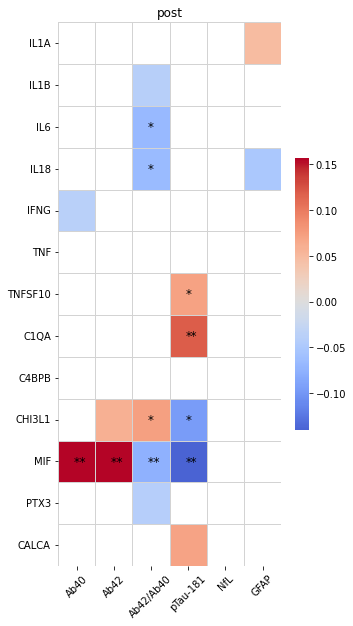

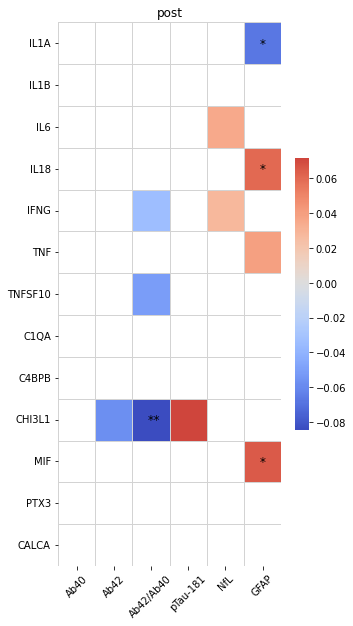

In [443]:
pp='post'
vars_show= vars['OLINK_pre']

for beta_name in ['','Case']:
    assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    (table,pvals,pvals_corr,sigs,betas,sdf)=model_table(outpts,[a + '_' + pp+'_cl' for a in assays],['int_simp_modpre'],vars_show,beta_name_add=beta_name,beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')

    table=table.rename(columns=cols_translate)
    table=table.T.rename(columns=cols_translate).T
    table=table.rename(columns={a:a[2:-7] for a in vars['OLINK_pre']})
    table.index=[a[:-6] for a in assays]
    tables['pre_int_OLINK_'+beta_name]=table.T
    table.T.to_excel('tables_test/pre_int_OLINK_'+beta_name+'.xlsx')
    
    rows=(pvals<1).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    #els=(pvals<0.05)
    #ccs_good_labels=ccs.index[rows]
    #ccs_good=ccs.values[rows]
    #ccs_good.shape
    mask=((pvals.T)[rows,:]>0.2).astype(bool)


    # Set the figure size
    plt.figure(figsize=(5,10))

    # Create the heatmap
    sns.heatmap(betas_in, annot=False, fmt=".2f", mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


#     for i in np.arange(6):

#         for j in range(mask.shape[0]):
#             if sigs[:,rows][i,j] == 1:
#                 plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    # Set the x-axis and y-axis labels using cols_translate
    plt.yticks(np.arange(mask.shape[0])+.5, betas_in.index[rows], rotation=0)
    plt.xticks(np.arange(len(assays))+0.5,[a[:-6] for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()


In [444]:
# Prior Inflammatory levels effects on cases and control.
beta_name=''
tables['pre_int_OLINK_'+beta_name]

,Ab40,Ab42,Ab42/Ab40,pTau-181,NfL,GFAP
n,820,818,809,788,782,782
IL1A,0.0225 (p=0.700),0.0440 (p=0.867),0.0325 (p=0.834),0.0358 (p=0.202),0.0137 (p=0.335),0.0485 (p=0.109)
IL1B,0.0747 (p=0.954),0.1063 (p=0.996),-0.0401 (p=0.122),-0.1026 (p=0.990),0.0256 (p=0.212),-0.0038 (p=0.901)
IL6,0.0624 (p=0.933),-0.0037 (p=0.462),-0.0682 (p=0.019*),-0.0760 (p=0.963),-0.0771 (p=0.994),-0.0144 (p=0.626)
IL18,0.0666 (p=0.941),0.0241 (p=0.729),-0.0664 (p=0.023*),-0.0489 (p=0.872),-0.0278 (p=0.812),-0.0505 (p=0.092)
IFNG,-0.0382 (p=0.189),-0.0230 (p=0.282),-0.0093 (p=0.392),0.0095 (p=0.414),-0.0158 (p=0.687),-0.0024 (p=0.937)
TNF,0.0110 (p=0.604),0.0342 (p=0.813),0.0154 (p=0.682),0.0304 (p=0.234),-0.0097 (p=0.624),-0.0230 (p=0.438)
TNFSF10,-0.0258 (p=0.262),0.0082 (p=0.587),0.0624 (p=0.975),0.0711 (p=0.040*),0.0014 (p=0.482),0.0121 (p=0.673)
C1QA,-0.0316 (p=0.457),-0.0450 (p=0.251),0.0121 (p=0.716),0.1186 (p=0.005**),0.0046 (p=0.883),0.0041 (p=0.891)
C4BPB,0.0250 (p=0.541),0.0370 (p=0.327),0.0135 (p=0.674),-0.0280 (p=0.503),0.0267 (p=0.382),0.0052 (p=0.860)


In [445]:
# Prior Inflammatory levels effects on cases and control.
beta_name='Case'

tables['pre_int_OLINK_'+beta_name]

,Ab40,Ab42,Ab42/Ab40,pTau-181,NfL,GFAP
n,820,818,809,788,782,782
IL1A,0.0068 (p=0.564),0.0246 (p=0.734),0.0284 (p=0.802),-0.0762 (p=0.962),-0.0031 (p=0.538),-0.0673 (p=0.026*)
IL1B,0.0183 (p=0.668),-0.0034 (p=0.465),0.0029 (p=0.535),0.0101 (p=0.406),-0.0059 (p=0.575),0.0216 (p=0.461)
IL6,-0.0145 (p=0.361),-0.0300 (p=0.214),-0.0133 (p=0.340),0.0297 (p=0.238),0.0354 (p=0.121),-0.0162 (p=0.575)
IL18,0.0361 (p=0.807),0.0410 (p=0.857),0.0043 (p=0.553),0.0182 (p=0.332),0.0138 (p=0.325),0.0600 (p=0.040*)
IFNG,0.0320 (p=0.771),0.0001 (p=0.501),-0.0336 (p=0.159),0.0021 (p=0.481),0.0277 (p=0.196),0.0304 (p=0.321)
TNF,0.0602 (p=0.928),0.0488 (p=0.899),0.0066 (p=0.581),-0.0297 (p=0.764),-0.0063 (p=0.582),0.0392 (p=0.182)
TNFSF10,0.0321 (p=0.787),0.0044 (p=0.547),-0.0511 (p=0.055),-0.1327 (p=0.999),0.0016 (p=0.479),-0.0321 (p=0.263)
C1QA,-0.0005 (p=0.991),0.0079 (p=0.840),0.0009 (p=0.977),-0.0313 (p=0.460),0.0033 (p=0.916),0.0124 (p=0.680)
C4BPB,0.0073 (p=0.857),-0.0040 (p=0.915),-0.0022 (p=0.944),-0.0239 (p=0.562),-0.0153 (p=0.612),0.0134 (p=0.645)


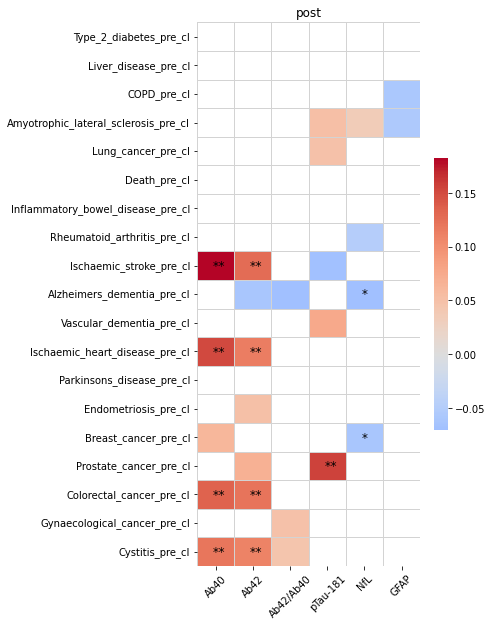

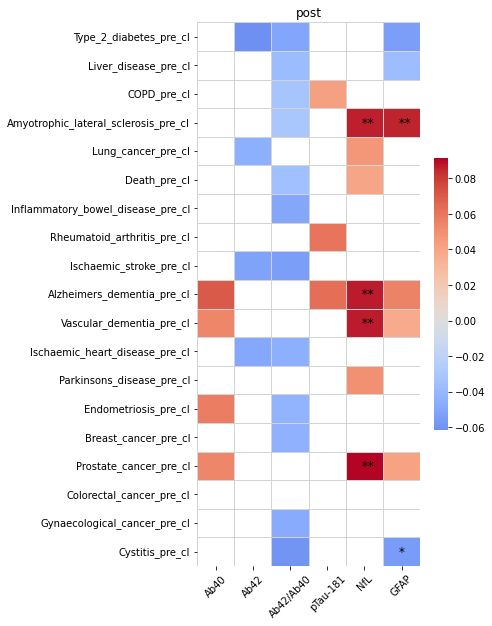

In [446]:
pp='post'
vars_show= vars['diseases_pre']

for beta_name in ['','Case']:
    assays =  SIMOA_assays # ['Ab40_regPl', 'Ab42_regPl', 'Ab42/Ab40_regPl', 'pTau-181_regPl', 'NfL_regPl', 'GFAP_regPl']# + ['P_TREM2','P_AXL','P_TYRO3','P_MIF','P_C1QA', 'P_C4BPB','P_IL6','P_IL18']
    (table,pvals,pvals_corr,sigs,betas,sdf)=model_table(outpts,[a + '_' + pp+'_cl' for a in assays],['int_simp_modpre'],vars_show,beta_name_add=beta_name,beta_dirs=[-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=True,FPR='col')

    table=table.rename(columns=cols_translate)
    table=table.T.rename(columns=cols_translate).T
    table=table.rename(columns={a:a[2:-7] for a in vars['OLINK_pre']})
    table.index=[a[:-6] for a in assays]
    tables['pre_int_diseases_'+beta_name]=table.T
    table.T.to_excel('tables_test/pre_int_diseases_'+beta_name+'.xlsx')
    
    rows=(pvals<1).sum(axis=0)>0
    betas_in=pd.DataFrame(betas,index=table.index,columns=table.columns[1:])
    betas_in=betas_in.iloc[:,rows].T
    #els=(pvals<0.05)
    #ccs_good_labels=ccs.index[rows]
    #ccs_good=ccs.values[rows]
    #ccs_good.shape
    mask=((pvals.T)[rows,:]>0.2).astype(bool)


    # Set the figure size
    plt.figure(figsize=(5,10))

    # Create the heatmap
    sns.heatmap(betas_in, annot=False, fmt=".2f", mask=mask, cmap="coolwarm",  linewidths=0.5, linecolor='lightgrey', cbar=True,  cbar_kws={"shrink": 0.5},center=0)

    for i in range(6):
        for j in range(mask.shape[0]):
            if pvals[:,rows][i,j] <0.05:
                plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    for i in range(6):
        for j in range(mask.shape[0]):
            if sigs[:,rows][i,j] == 1:
                plt.text(i + 0.5, j + 0.5, "   *", ha='center', va='center', color='black', fontsize=12)


#     for i in np.arange(6):

#         for j in range(mask.shape[0]):
#             if sigs[:,rows][i,j] == 1:
#                 plt.text(i + 0.5, j + 0.5, "*", ha='center', va='center', color='black', fontsize=12)

    # Set the x-axis and y-axis labels using cols_translate
    plt.yticks(np.arange(mask.shape[0])+.5, betas_in.index[rows], rotation=0)
    plt.xticks(np.arange(len(assays))+0.5,[a[:-6] for a in assays],rotation=45)



    # Set the title
    plt.title(pp)

    # Show the plot
    plt.show()



### Extended Model results


In [447]:
outpts=calc_pre_post_models(data,all_matched,outpts, SIMOA_assays,data_ins=['simp'],models=['modpre_ext'],inter_vars= [],a='post_cl',c='',ext='-3.0')


Ab40_regPl
Ab42_regPl
Ab42/Ab40_regPl
pTau-181_regPl
NfL_regPl
GFAP_regPl


In [448]:
outpts['pTau-181_regPl_post_cl_simp_modpre_ext'].pvalues

Intercept                     2.043901e-03
C(KeyWorker)[T.True]          3.492982e-01
Q('pTau-181_regPl_pre_cl')    1.130566e-59
Q('Age-3.0')                  1.243828e-10
Q('22001-0.0')                8.189514e-03
Q('assessment_sep')           1.400280e-01
Q('assessment_sep^2')         1.375971e-01
Q('21002-2.0')                3.965163e-01
Q('Activity-2.0')             5.407816e-01
Q('709-3.0')                  1.866968e-01
Case_bin                      5.125150e-01
dtype: float64

In [449]:
# percentage change with Case
IDP='Ab42/Ab40_regPl_post_cl'
a='Case_bin'
case="Q('" + a + "')"
print('PC for simple model: ' + str(outpts[IDP+'_simp_modpre'].pc))
#print(outpts_pre[IDP+'_'+a+'_simp'].pvalues)
print('PC for ext model: ' + str(outpts[IDP+'_simp_modpre_ext'].pc))
#print(outpts_pre[IDP+'_simp'].pvalues)

PC for simple model: -2.074513645699812
PC for ext model: -1.8816784578694374


In [450]:
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,assays_regPl[:6],['_post_cl_simp_modpre_ext'],['Case_bin','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre','21002-2.0','Activity-2.0','709-3.0','KeyWorker'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/ext_model.xlsx')
table.style.format()

,n,Case/Control status,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein,Weight,Moderate activity (min/d),Number in Household,KeyWorker
Assay,,,,,,,,,,,
Aβ40,1050,0.0229 (p=0.187),-0.0665 (p=0.028*),0.1660 (p=1.5e-08**),-0.0140 (p=0.926),0.0666 (p=0.659),0.5031 (p=4.6e-70**),0.0626 (p=0.018*),0.0081 (p=0.376),-0.0162 (p=0.722),-0.0172 (p=0.747)
Aβ42,1056,-0.0236 (p=0.168),-0.0444 (p=0.123),0.0372 (p=0.166),0.0902 (p=0.532),-0.0442 (p=0.759),0.6162 (p=8.7e-111**),0.0393 (p=0.916),-0.0074 (p=0.381),-0.0106 (p=0.342),-0.0168 (p=0.247)
Aβ42/Aβ40,1038,-0.0556 (p=0.004**),0.0080 (p=0.741),-0.0408 (p=0.077),0.1460 (p=0.225),-0.1529 (p=0.203),0.7399 (p=8.3e-179**),-0.0139 (p=0.281),-0.0079 (p=0.351),0.0183 (p=0.798),-0.0031 (p=0.440)
pTau-181,1040,-0.0172 (p=0.744),0.0828 (p=0.008**),0.1893 (p=1.2e-10**),0.2277 (p=0.140),-0.2289 (p=0.138),0.4729 (p=1.1e-59**),-0.0259 (p=0.802),-0.0160 (p=0.730),0.0369 (p=0.093),0.0246 (p=0.175)
NfL,1058,-0.0071 (p=0.651),-0.0012 (p=0.955),0.1315 (p=6.7e-09**),0.1782 (p=0.096),-0.1120 (p=0.294),0.7348 (p=4.9e-172**),-0.0497 (p=0.989),-0.0174 (p=0.830),-0.0163 (p=0.799),0.0381 (p=0.018*)
GFAP,1061,0.0002 (p=0.496),-0.0465 (p=0.023*),0.1469 (p=3.8e-12**),0.1106 (p=0.277),-0.1038 (p=0.306),0.7440 (p=1.7e-198**),-0.0472 (p=0.990),0.0056 (p=0.373),-0.0001 (p=0.501),0.0103 (p=0.276)


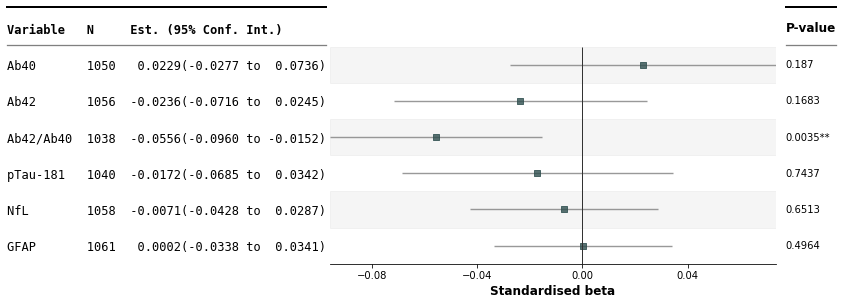

In [451]:
ff=fp.forestplot(resultstable_ext['Case_bin'],  # the dataframe with results data
              estimate="betas_norm",  # col containing estimated effect size 
              ll="ci_l_norm", hl="ci_u_norm",  # columns containing conf. int. lower and higher limits
              varlabel="Assay",  # column containing variable label
              thresholds=[0.0001,0.02,0.05],
              symbols=['***','**','*'],
              decimal_precision=4,
              pval='pvals',
              annote=["n", "est_ci"],
              annoteheaders=["N", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              #ylabel="Confidence interval",  # y-label title
              xlabel="Standardised beta",  # x-label title
              table=True,
              color_alt_rows=True,figsize=(8,4.5),kwargs={"xlinecolor": ".5"})
offset=0.3
ff.set_ylim((ff.get_ylim()[0], ff.get_ylim()[1]+offset))

fig=plt.gcf()
fig.savefig('ext_fig.svg', format="svg",dpi=300, bbox_inches = "tight")

In [452]:
(table,pvals,pvals_corr,sigs,betas,resultstable_f)=model_table(outpts,assays_regPl[:6],['_post_cl_age_f_simp_modpre_ext'],['Case_bin','Age-3.0','Case_bin:','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre','21002-2.0','Activity-2.0','709-3.0','KeyWorker'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age-Related Vulnerability'})
table=table.rename(columns={'Case_bin:':'Age-Related Vulnerability: Case/Control status'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/ext_model_age_f.xlsx')
table.style.format()

,n,Case/Control status,Age-Related Vulnerability,ARV : Case/Control status,Genetic Sex,Assessment Interval (d),Assessment Interval^2,Baseline protein,Weight,Moderate activity (min/d),Number in Household,KeyWorker
Assay,,,,,,,,,,,,
Aβ40,1050,0.0643 (p=0.037*),0.2028 (p=6.2e-08**),-0.0684 (p=0.114),-0.0687 (p=0.024*),0.0087 (p=0.954),0.0430 (p=0.388),0.5005 (p=4.1e-69**),0.0626 (p=0.018*),0.0063 (p=0.403),-0.0314 (p=0.879),-0.0240 (p=0.825)
Aβ42,1056,0.0333 (p=0.835),0.0854 (p=0.014*),-0.0967 (p=0.019*),-0.0439 (p=0.127),0.0897 (p=0.535),-0.0440 (p=0.380),0.6166 (p=1.000),0.0390 (p=0.915),-0.0069 (p=0.389),-0.0174 (p=0.247),-0.0210 (p=0.195)
Aβ42/Aβ40,1038,-0.0485 (p=0.046*),-0.0439 (p=0.137),-0.0126 (p=0.716),0.0106 (p=0.661),0.1324 (p=0.272),-0.1401 (p=0.122),0.7379 (p=1.000),-0.0149 (p=0.265),-0.0069 (p=0.368),0.0188 (p=0.811),-0.0031 (p=0.440)
pTau-181,1040,-0.0818 (p=0.987),0.1241 (p=9.4e-04**),0.1143 (p=0.009**),0.0813 (p=0.009**),0.2539 (p=0.099),-0.2573 (p=0.953),0.4739 (p=9.6e-61**),-0.0268 (p=0.811),-0.0189 (p=0.766),0.0246 (p=0.182),0.0218 (p=0.201)
NfL,1058,-0.0262 (p=0.847),0.0878 (p=0.001**),0.0365 (p=0.235),-0.0005 (p=0.980),0.1891 (p=0.079),-0.1253 (p=0.878),0.7498 (p=1.5e-183**),-0.0485 (p=0.987),-0.0188 (p=0.848),-0.0297 (p=0.941),0.0341 (p=0.031*)
GFAP,1061,-0.0019 (p=0.531),0.1123 (p=1.6e-05**),0.0074 (p=0.800),-0.0418 (p=0.042*),0.1163 (p=0.257),-0.1134 (p=0.866),0.7594 (p=2.2e-207**),-0.0478 (p=0.990),0.0047 (p=0.393),-0.0174 (p=0.833),0.0046 (p=0.395)


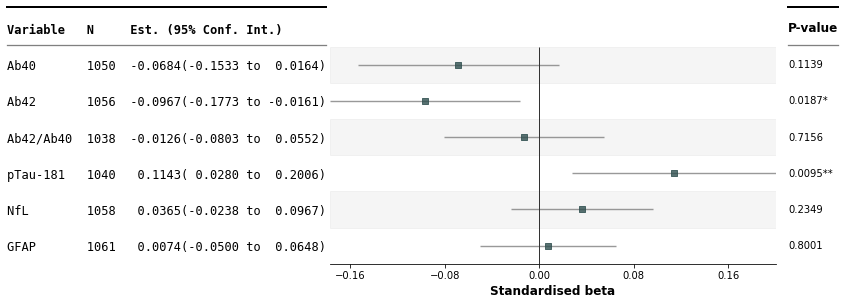

In [1452]:
ff=fp.forestplot(resultstable_f['Case_bin:'],  # the dataframe with results data
              estimate="betas_norm",  # col containing estimated effect size 
              ll="ci_l_norm", hl="ci_u_norm",  # columns containing conf. int. lower and higher limits
              varlabel="Assay",  # column containing variable label
              thresholds=[0.0001,.015,0.05],
              decimal_precision=4,
              symbols=['***','**','*'],
              pval='pvals',
              annote=["n", "est_ci"],
              annoteheaders=["N", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              #ylabel="Confidence interval",  # y-label title
              xlabel="Standardised beta",  # x-label title
              table=True,
              color_alt_rows=True,figsize=(8,4.5),kwargs={"xlinecolor": ".5"})
offset=0.3
ff.set_ylim((ff.get_ylim()[0], ff.get_ylim()[1]+offset))

fig=plt.gcf()
fig.savefig('tables_test/age_f_ext_fig.svg', format="svg",dpi=300, bbox_inches = "tight")

### APOE model results

In [454]:

outpts=calc_pre_post_models(data,all_matched,outpts, SIMOA_assays,data_ins=['simp'],models=['modpre_APOE'],inter_vars= [],a='post_cl',c='',ext='-3.0')


Ab40_regPl
Ab42_regPl
Ab42/Ab40_regPl
pTau-181_regPl
NfL_regPl
GFAP_regPl


In [455]:

model='_simp_modpre_APOE'
age_f=''
vars_show=['Case_bin','Age-3.0','22001-0.0','assessment_sep','A33vA34','A33vA44','A33vA32','Smok']

#model='modpre'
#outpts[IDP+age_f+data_in + '_' + model].pvalues/2
(table,pvals,pvals_corr,sigs,betas,resultst)=model_table(outpts,[a + '_post_cl' for a in assays],[model],vars_show,beta_dirs=[-1,-1,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],returndata=True,diff_models=False,FPR='col')
table=table.rename(columns=cols_translate)
table=table.T.rename(columns=cols_translate).T
table.to_excel('tables_test/basic_APOE.xlsx')
table.style.format()

,n,Case/Control status,Age (pandemic),Genetic Sex,Assessment Interval (d),A33vA34,A33vA44,A33vA32,Smok
Assay,,,,,,,,,
Ab40_regPl_p,1164,0.0195 (p=0.790),0.1582 (p=1.000),-0.0481 (p=0.077),-0.0077 (p=0.478),-0.0046 (p=0.427),0.0135 (p=0.711),-0.0038 (p=0.439),-0.0014 (p=0.955)
Ab42_regPl_p,1171,-0.0397 (p=0.041*),0.0320 (p=0.910),-0.0334 (p=0.147),0.0300 (p=0.588),-0.0300 (p=0.101),-0.0264 (p=0.125),0.0251 (p=0.857),-0.0082 (p=0.719)
Ab42/Ab40_regPl_p,1150,-0.0642 (p=4.4e-04**),-0.0482 (p=0.010**),0.0076 (p=0.612),0.0874 (p=0.779),-0.0240 (p=0.113),-0.0322 (p=0.048*),0.0213 (p=0.859),0.0083 (p=0.668)
pTau-181_regPl_p,1148,-0.0055 (p=0.588),0.1516 (p=5.6e-09**),0.1301 (p=1.1e-04**),0.3302 (p=0.012*),-0.0120 (p=0.681),0.0360 (p=0.074),0.0033 (p=0.449),0.0134 (p=0.590)
NfL_regPl_p,1172,-0.0103 (p=0.722),0.1229 (p=4.9e-09**),0.0027 (p=0.456),0.2107 (p=0.022*),0.0132 (p=0.234),0.0268 (p=0.065),-0.0179 (p=0.840),0.0281 (p=0.111)
GFAP_regPl_p,1176,-0.0023 (p=0.556),0.1404 (p=3.1e-13**),-0.0456 (p=0.975),0.1855 (p=0.030*),0.0301 (p=0.040*),-0.0022 (p=0.553),-0.0361 (p=0.982),0.0251 (p=0.134)


In [456]:
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,assays_regPl[:6],['_post_cl_simp_modpre_APOE'],['Case_bin','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre','A34','A44','A32','Smoking','Diabetes','Hip/Waist'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/APOE_model.xlsx')
table.style.format()

,n,Case/Control status,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein,APOE-e3e4,APOE-e4e4,APOE-e3e2,Smoking,Diabetes,Hip/Waist
Assay,,,,,,,,,,,,,
Aβ40,1164,0.0195 (p=0.210),-0.0481 (p=0.155),0.1582 (p=1.4e-09**),-0.0077 (p=0.957),0.0602 (p=0.674),0.5008 (p=2.0e-77**),-0.0046 (p=0.573),0.0135 (p=0.289),-0.0038 (p=0.561),-0.0014 (p=0.523),0.0773 (p=8.9e-04**),-0.0128 (p=0.642)
Aβ42,1171,-0.0397 (p=0.041*),-0.0334 (p=0.295),0.0320 (p=0.180),0.0300 (p=0.825),0.0107 (p=0.937),0.6180 (p=8.7e-125**),-0.0300 (p=0.101),-0.0264 (p=0.125),0.0251 (p=0.857),-0.0082 (p=0.359),0.0288 (p=0.892),0.0066 (p=0.579)
Aβ42/Aβ40,1150,-0.0642 (p=4.4e-04**),0.0076 (p=0.777),-0.0482 (p=0.020*),0.0874 (p=0.442),-0.1002 (p=0.377),0.7334 (p=3.6e-195**),-0.0240 (p=0.113),-0.0322 (p=0.048*),0.0213 (p=0.859),0.0083 (p=0.666),-0.0449 (p=0.011**),0.0156 (p=0.711)
pTau-181,1148,-0.0055 (p=0.588),0.1301 (p=2.1e-04**),0.1516 (p=1.1e-08**),0.3302 (p=0.025*),-0.3361 (p=0.022*),0.4720 (p=1.6e-64**),-0.0120 (p=0.681),0.0360 (p=0.074),0.0033 (p=0.449),0.0134 (p=0.295),-0.0338 (p=0.909),0.0504 (p=0.082)
NfL,1172,-0.0103 (p=0.722),0.0027 (p=0.911),0.1229 (p=9.8e-09**),0.2107 (p=0.044*),-0.1547 (p=0.137),0.7345 (p=5.4e-188**),0.0132 (p=0.234),0.0268 (p=0.065),-0.0179 (p=0.840),0.0281 (p=0.056),0.0395 (p=0.014*),0.0427 (p=0.050*)
GFAP,1176,-0.0023 (p=0.556),-0.0456 (p=0.050),0.1404 (p=6.2e-13**),0.1855 (p=0.061),-0.1882 (p=0.057),0.7459 (p=7.8e-220**),0.0301 (p=0.040*),-0.0022 (p=0.553),-0.0361 (p=0.982),0.0251 (p=0.067),0.0101 (p=0.276),0.0219 (p=0.183)


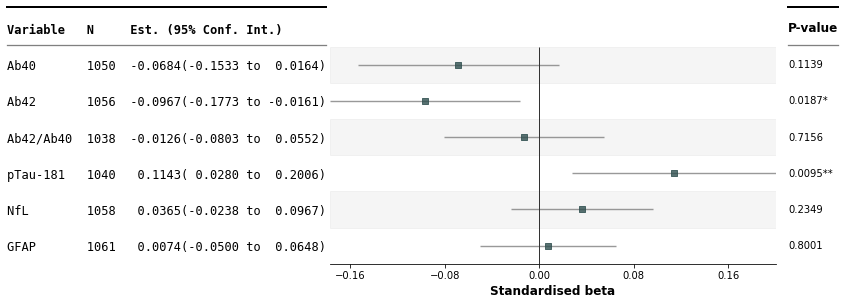

In [457]:
ff=fp.forestplot(resultstable_f["Case_bin:"],  # the dataframe with results data
              estimate="betas_norm",  # col containing estimated effect size 
              ll="ci_l_norm", hl="ci_u_norm",  # columns containing conf. int. lower and higher limits
              varlabel="Assay",  # column containing variable label
              thresholds=[0.0001,.015,0.05],
              decimal_precision=4,
              symbols=['***','**','*'],
              pval='pvals',
              annote=["n", "est_ci"],
              annoteheaders=["N", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              #ylabel="Confidence interval",  # y-label title
              xlabel="Standardised beta",  # x-label title
              table=True,
              color_alt_rows=True,figsize=(8,4.5),kwargs={"xlinecolor": ".5"})
offset=0.3
ff.set_ylim((ff.get_ylim()[0], ff.get_ylim()[1]+offset))
plt.show()

In [458]:
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,assays_regPl[:6],['_post_cl_age_f_simp_modpre_APOE'],['Case_bin','Age-3.0','Case_bin:','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre','A34','A44','A32','Smoking','Diabetes','Hip/Waist','GeneralHealth-2.0'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(columns={'Age (pandemic)':'Age-Related Vulnerability'})
table=table.rename(columns={'Case_bin:':'Age-Related Vulnerability: Case/Control status'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/APOE_model_age_f.xlsx')
table.style.format()

,n,Case/Control status,Age (y),ARV : Case/Control status,Genetic Sex,Assessment Interval (d),Assessment Interval^2,Baseline protein,APOE-e3e4,APOE-e4e4,APOE-e3e2,Smoking,Diabetes,Hip/Waist,Health self-rating
Assay,,,,,,,,,,,,,,,
Aβ40,1164,0.0460 (p=0.087),0.1865 (p=1.7e-07**),-0.0466 (p=0.867),-0.0593 (p=0.079),0.0200 (p=0.889),0.0320 (p=0.823),0.4975 (p=6.9e-76**),-0.0063 (p=0.800),0.0164 (p=0.500),-0.0079 (p=0.753),-0.0014 (p=0.953),0.0758 (p=0.002**),-0.0244 (p=0.484),-0.0418 (p=0.094)
Aβ42,1171,0.0025 (p=0.531),0.0743 (p=0.025*),-0.0742 (p=0.030*),-0.0360 (p=0.257),0.0360 (p=0.791),0.0046 (p=0.973),0.6178 (p=1.3e-124**),-0.0309 (p=0.189),-0.0255 (p=0.267),0.0223 (p=0.343),-0.0094 (p=0.682),0.0261 (p=0.262),0.0032 (p=0.922),-0.0158 (p=0.502)
Aβ42/Aβ40,1150,-0.0541 (p=0.023*),-0.0405 (p=0.150),-0.0178 (p=0.296),0.0106 (p=0.694),0.0780 (p=0.494),-0.0908 (p=0.424),0.7333 (p=7.5e-196**),-0.0238 (p=0.230),-0.0327 (p=0.091),0.0216 (p=0.277),0.0077 (p=0.688),-0.0455 (p=0.021*),0.0180 (p=0.517),0.0026 (p=0.898)
pTau-181,1148,-0.0521 (p=0.934),0.1146 (p=0.001**),0.0817 (p=0.028*),0.1222 (p=4.7e-04**),0.3558 (p=0.015**),-0.3613 (p=0.014**),0.4711 (p=5.7e-65**),-0.0122 (p=0.631),0.0376 (p=0.130),0.0035 (p=0.891),0.0155 (p=0.533),-0.0324 (p=0.198),0.0448 (p=0.211),0.0650 (p=0.011**)
NfL,1172,-0.0320 (p=0.903),0.0847 (p=0.002**),0.0393 (p=0.098),-0.0057 (p=0.818),0.2266 (p=0.031*),-0.1713 (p=0.101),0.7479 (p=1.2e-201**),0.0131 (p=0.472),0.0282 (p=0.112),-0.0189 (p=0.298),0.0287 (p=0.104),0.0408 (p=0.024*),0.0316 (p=0.217),0.0254 (p=0.162)
GFAP,1176,-0.0012 (p=0.520),0.1165 (p=5.6e-06**),-0.0012 (p=0.516),-0.0528 (p=0.025*),0.1970 (p=0.048*),-0.2024 (p=0.042*),0.7598 (p=3.4e-228**),0.0290 (p=0.093),-0.0006 (p=0.973),-0.0377 (p=0.030*),0.0263 (p=0.119),0.0112 (p=0.514),0.0086 (p=0.722),0.0359 (p=0.038*)


In [459]:
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,assays_regPl[:6],['_post_cl_age_f_simp_modpre_APOE'],['Case_bin','Age-3.0','Case_bin:','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre','A34','A44','A32','Smoking','Diabetes','Hip/Waist','GeneralHealth-2.0'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(columns={'Age (pandemic)':'Age-Related Vulnerability'})
table=table.rename(columns={'Case_bin:':'Age-Related Vulnerability: Case/Control status'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/APOE_model_age_f.xlsx')
table.style.format()

,n,Case/Control status,Age (y),ARV : Case/Control status,Genetic Sex,Assessment Interval (d),Assessment Interval^2,Baseline protein,APOE-e3e4,APOE-e4e4,APOE-e3e2,Smoking,Diabetes,Hip/Waist,Health self-rating
Assay,,,,,,,,,,,,,,,
Aβ40,1164,0.0460 (p=0.087),0.1865 (p=1.7e-07**),-0.0466 (p=0.867),-0.0593 (p=0.079),0.0200 (p=0.889),0.0320 (p=0.823),0.4975 (p=6.9e-76**),-0.0063 (p=0.800),0.0164 (p=0.500),-0.0079 (p=0.753),-0.0014 (p=0.953),0.0758 (p=0.002**),-0.0244 (p=0.484),-0.0418 (p=0.094)
Aβ42,1171,0.0025 (p=0.531),0.0743 (p=0.025*),-0.0742 (p=0.030*),-0.0360 (p=0.257),0.0360 (p=0.791),0.0046 (p=0.973),0.6178 (p=1.3e-124**),-0.0309 (p=0.189),-0.0255 (p=0.267),0.0223 (p=0.343),-0.0094 (p=0.682),0.0261 (p=0.262),0.0032 (p=0.922),-0.0158 (p=0.502)
Aβ42/Aβ40,1150,-0.0541 (p=0.023*),-0.0405 (p=0.150),-0.0178 (p=0.296),0.0106 (p=0.694),0.0780 (p=0.494),-0.0908 (p=0.424),0.7333 (p=7.5e-196**),-0.0238 (p=0.230),-0.0327 (p=0.091),0.0216 (p=0.277),0.0077 (p=0.688),-0.0455 (p=0.021*),0.0180 (p=0.517),0.0026 (p=0.898)
pTau-181,1148,-0.0521 (p=0.934),0.1146 (p=0.001**),0.0817 (p=0.028*),0.1222 (p=4.7e-04**),0.3558 (p=0.015**),-0.3613 (p=0.014**),0.4711 (p=5.7e-65**),-0.0122 (p=0.631),0.0376 (p=0.130),0.0035 (p=0.891),0.0155 (p=0.533),-0.0324 (p=0.198),0.0448 (p=0.211),0.0650 (p=0.011**)
NfL,1172,-0.0320 (p=0.903),0.0847 (p=0.002**),0.0393 (p=0.098),-0.0057 (p=0.818),0.2266 (p=0.031*),-0.1713 (p=0.101),0.7479 (p=1.2e-201**),0.0131 (p=0.472),0.0282 (p=0.112),-0.0189 (p=0.298),0.0287 (p=0.104),0.0408 (p=0.024*),0.0316 (p=0.217),0.0254 (p=0.162)
GFAP,1176,-0.0012 (p=0.520),0.1165 (p=5.6e-06**),-0.0012 (p=0.516),-0.0528 (p=0.025*),0.1970 (p=0.048*),-0.2024 (p=0.042*),0.7598 (p=3.4e-228**),0.0290 (p=0.093),-0.0006 (p=0.973),-0.0377 (p=0.030*),0.0263 (p=0.119),0.0112 (p=0.514),0.0086 (p=0.722),0.0359 (p=0.038*)


### GFR model

In [460]:
outpts=calc_pre_post_models(data,all_matched,outpts, SIMOA_assays,data_ins=['simp'],models=['modpre_GFR'],inter_vars= [],a='post_cl',c='',ext='-3.0')


Ab40_regPl
Ab42_regPl
Ab42/Ab40_regPl
pTau-181_regPl
NfL_regPl
GFAP_regPl


In [461]:
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,assays_regPl[:6],['_post_cl_simp_modpre_GFR'],['Case_bin','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre','GFR'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/GFR_model.xlsx')
table.style.format()

,n,Case/Control status,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein,GFR
Assay,,,,,,,,
Aβ40,684,0.0137 (p=0.332),0.0110 (p=0.733),0.0993 (p=0.005**),0.0931 (p=0.617),-0.0252 (p=0.892),0.4580 (p=1.6e-38**),-0.1806 (p=1.000)
Aβ42,688,-0.0378 (p=0.100),-0.0237 (p=0.428),-0.0008 (p=0.981),-0.1134 (p=0.515),0.1732 (p=0.319),0.6227 (p=1.7e-75**),-0.0767 (p=0.010**)
Aβ42/Aβ40,676,-0.0666 (p=0.005**),-0.0304 (p=0.248),-0.0404 (p=0.171),-0.1205 (p=0.424),0.1170 (p=0.437),0.7235 (p=2.0e-111**),0.0475 (p=0.952)
pTau-181,674,-0.0174 (p=0.705),0.1099 (p=0.001**),0.1867 (p=4.2e-07**),0.1161 (p=0.548),-0.1405 (p=0.467),0.4667 (p=2.5e-37**),0.0466 (p=0.100)
NfL,688,0.0046 (p=0.423),-0.0222 (p=0.349),0.1283 (p=1.0e-05**),0.1293 (p=0.348),-0.0695 (p=0.612),0.7285 (p=3.7e-107**),-0.0071 (p=0.608)
GFAP,691,-0.0154 (p=0.758),-0.0652 (p=0.004**),0.1437 (p=1.1e-07**),0.1275 (p=0.328),-0.1126 (p=0.386),0.7460 (p=2.7e-129**),0.0111 (p=0.324)


### DiseaseModel

In [462]:
outpts=calc_pre_post_models(data,all_matched,outpts, diseases,data_ins=['disease'],models=['modpre'],inter_vars= [],a='post_cl',c='',ext='-3.0')


Type_2_diabetes
Liver_disease
COPD
Amyotrophic_lateral_sclerosis
Lung_cancer
Death
Inflammatory_bowel_disease
Rheumatoid_arthritis
Ischaemic_stroke
Alzheimers_dementia
Vascular_dementia
Ischaemic_heart_disease
Parkinsons_disease
Endometriosis
Breast_cancer
Prostate_cancer
Colorectal_cancer
Gynaecological_cancer
Cystitis


In [463]:
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,diseases,['_post_cl_disease_modpre'],['Case_bin','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],beta_vars=[1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True,rem_txt=35)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/disease_model.xlsx')
table.style.format()


,n,Case/Control status,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein
Assay,,,,,,,
Type_2_diabetes,619,0.0482 (p=0.015**),0.0599 (p=0.010**),0.0446 (p=0.058),-0.1306 (p=0.321),0.1721 (p=0.190),0.8050 (p=4.9e-139**)
Liver_disease,619,0.0463 (p=0.048*),0.0648 (p=0.026*),0.0885 (p=0.003**),0.2311 (p=0.163),-0.2303 (p=0.163),0.6764 (p=3.1e-80**)
COPD,619,0.0707 (p=0.001**),0.0376 (p=0.105),0.1435 (p=8.4e-07**),0.0265 (p=0.848),0.0139 (p=0.919),0.7301 (p=1.9e-97**)
Amyotrophic_lateral_sclerosis,619,0.0438 (p=0.108),-0.0233 (p=0.513),0.1595 (p=2.8e-05**),-0.2734 (p=0.193),0.3334 (p=0.112),0.4211 (p=2.1e-26**)
Lung_cancer,619,0.0757 (p=0.007**),0.0602 (p=0.050*),0.1397 (p=6.9e-05**),-0.1279 (p=0.482),0.1145 (p=0.529),0.5741 (p=2.7e-51**)
Death,619,0.0527 (p=0.014**),0.1011 (p=5.8e-05**),0.1554 (p=3.1e-06**),-0.1556 (p=0.277),0.2257 (p=0.114),0.6707 (p=1.6e-67**)
Inflammatory_bowel_disease,619,-0.0040 (p=0.554),0.0385 (p=0.188),0.0906 (p=0.003**),0.1780 (p=0.303),-0.1352 (p=0.433),0.6663 (p=6.2e-81**)
Rheumatoid_arthritis,619,0.0089 (p=0.372),-0.0317 (p=0.252),0.1492 (p=1.2e-06**),-0.2746 (p=0.092),0.2990 (p=0.066),0.6612 (p=4.5e-78**)
Ischaemic_stroke,619,0.0705 (p=0.003**),0.0862 (p=9.4e-04**),0.1447 (p=2.1e-06**),-0.0022 (p=0.988),0.0660 (p=0.657),0.6804 (p=4.1e-79**)


### ADNI and cog model


In [464]:
outpts=calc_pre_post_models(data,all_matched,outpts, ['adni_mean','cog_vars_gi','GeneralHealth'],data_ins=['simp'],models=['modpre'],inter_vars= [],a='post_cl',c='',ext='-3.0')


adni_mean
cog_vars_gi
GeneralHealth


In [465]:
# table of basic model results

(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,['adni_mean','cog_vars_gi','GeneralHealth'],['_post_cl_simp_modpre'],['Case_bin','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/ADNI_model.xlsx')
table.style.format()

,n,Case/Control status,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein
Assay,,,,,,,
adn,1013,0.0108 (p=0.279),0.0128 (p=0.246),0.0758 (p=7.2e-05**),0.1358 (p=0.103),-0.1325 (p=0.216),0.8033 (p=1.3e-232**)
cog_v,675,-0.0432 (p=0.034*),0.0107 (p=0.672),-0.1145 (p=7.2e-06**),-0.1083 (p=0.230),0.0386 (p=0.792),0.7464 (p=2.0e-125**)
General,1195,-0.0552 (p=0.006**),-0.0281 (p=0.103),0.0187 (p=0.406),-0.0085 (p=0.474),-0.0001 (p=0.999),0.6459 (p=1.3e-142**)


In [466]:
outpts['cog_vars_gi_post_cl_simp_modpre'].pc

-1.9887407386851317

In [467]:
outpts['GeneralHealth_post_cl_simp_modpre'].pc

-2.391726967621914

In [473]:
# Age Interaction
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,['adni_mean','cog_vars_gi','GeneralHealth'],['_post_cl_age_f_simp_modpre'],['Case_bin','Case_bin:','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/ADNI_model_age_f.xlsx')
table.style.format()

,n,Case/Control status,ARV : Case/Control status,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein
Assay,,,,,,,,
adn,1013,-0.0252 (p=0.833),0.0626 (p=0.025*),0.0103 (p=0.582),0.0435 (p=0.050*),0.1551 (p=0.149),-0.1527 (p=0.155),0.8009 (p=5.9e-232**)
cog_v,675,-0.0271 (p=0.209),-0.0276 (p=0.250),0.0187 (p=0.436),-0.1090 (p=9.1e-04**),-0.1451 (p=0.322),0.0728 (p=0.619),0.7457 (p=1.000)
General,1195,-0.0644 (p=0.019*),0.0161 (p=0.664),-0.0298 (p=0.182),0.0180 (p=0.715),-0.0011 (p=0.993),-0.0064 (p=0.961),0.6458 (p=1.000)


In [474]:
# ADNI (pre)) interaction with proteins

#[IDP+'_'+inter +'_int_'+age_f+data_in + '_' + model]
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,assays_regPl[:6],['_post_cl_adni_mean_pre_cl_int_simp_modpre'],['Case_bin','adni',':Case','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/ADNI_int_model.xlsx')
table.style.format()

,n,Case/Control status,adni,:Case,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein
Assay,,,,,,,,,
Aβ40,1194,-0.1112 (p=0.900),0.0319 (p=0.172),-0.1459 (p=0.103),-0.0298 (p=0.891),0.1727 (p=1.0e-11**),0.0633 (p=0.651),-0.0113 (p=0.532),0.5026 (p=2.8e-80**)
Aβ42,1201,-0.2233 (p=0.003**),0.0373 (p=0.882),-0.2028 (p=0.015*),-0.0304 (p=0.089),0.0345 (p=0.131),0.0611 (p=0.642),-0.0210 (p=0.436),0.6278 (p=1.000)
Aβ42/Aβ40,1180,-0.1202 (p=0.039*),0.0146 (p=0.709),-0.0638 (p=0.363),-0.0070 (p=0.357),-0.0560 (p=0.005**),0.0429 (p=0.695),-0.0523 (p=0.316),0.7449 (p=1.000)
pTau-181,1177,0.2036 (p=0.011**),-0.0446 (p=0.902),0.2316 (p=0.012**),0.0984 (p=4.3e-05**),0.1404 (p=4.9e-08**),0.2648 (p=0.065),-0.2656 (p=0.968),0.4737 (p=1.4e-67**)
NfL,1202,0.0267 (p=0.336),-0.0358 (p=0.928),0.0328 (p=0.614),-0.0201 (p=0.873),0.1177 (p=1.1e-08**),0.1860 (p=0.068),-0.1266 (p=0.894),0.7428 (p=1.4e-198**)
GFAP,1205,0.0171 (p=0.387),-0.0245 (p=0.853),0.0236 (p=0.703),-0.0563 (p=1.000),0.1374 (p=5.3e-13**),0.1591 (p=0.101),-0.1598 (p=0.951),0.7483 (p=3.0e-226**)


In [475]:
 outpts['Ab42_regPl_post_cl_adni_mean_diff_cl_int_simp_modpre'].pvalues/2

Intercept                           9.524866e-06
Q('Ab42_regPl_pre_cl')             2.877036e-124
Q('Age-3.0')                        1.305748e-01
Q('22001-0.0')                      9.468769e-02
Q('assessment_sep')                 3.228099e-01
Q('assessment_sep^2')               4.424571e-01
Q('adni_mean_diff_cl')              6.235006e-02
Case_bin                            7.821621e-02
Q('adni_mean_diff_cl'):Case_bin     6.150049e-02
dtype: float64

In [476]:
# ADNI (diff) interaction with proteins

#[IDP+'_'+inter +'_int_'+age_f+data_in + '_' + model]
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,assays_regPl[:6],['_post_cl_adni_mean_diff_cl_int_simp_modpre'],['Case_bin','adni',':Case','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/ADNI_int_model.xlsx')
table.style.format()

,n,Case/Control status,adni,:Case,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein
Assay,,,,,,,,,
Aβ40,1110,0.0230 (p=0.181),-0.0114 (p=0.624),0.0303 (p=0.402),-0.0301 (p=0.885),0.1610 (p=1.4e-09**),0.0831 (p=0.568),-0.0322 (p=0.588),0.5089 (p=6.0e-76**)
Aβ42,1115,-0.0333 (p=0.078),-0.0514 (p=0.062),0.0519 (p=0.123),-0.0307 (p=0.095),0.0269 (p=0.261),0.0626 (p=0.646),-0.0196 (p=0.442),0.6300 (p=1.000)
Aβ42/Aβ40,1096,-0.0592 (p=0.001**),-0.0275 (p=0.166),0.0015 (p=0.959),-0.0092 (p=0.322),-0.0570 (p=0.006**),0.0283 (p=0.805),-0.0369 (p=0.373),0.7392 (p=1.000)
pTau-181,1090,-0.0067 (p=0.603),0.0798 (p=0.015**),-0.0699 (p=0.060),0.1064 (p=2.3e-05**),0.1322 (p=1.0e-06**),0.2306 (p=0.122),-0.2386 (p=0.945),0.4708 (p=1.1e-61**)
NfL,1116,-0.0037 (p=0.579),0.0488 (p=0.031*),-0.0308 (p=0.241),-0.0241 (p=0.907),0.1134 (p=1.3e-07**),0.1693 (p=0.110),-0.1090 (p=0.849),0.7418 (p=3.9e-184**)
GFAP,1119,-0.0072 (p=0.661),0.0128 (p=0.304),0.0013 (p=0.959),-0.0524 (p=0.999),0.1354 (p=8.7e-12**),0.1227 (p=0.222),-0.1245 (p=0.893),0.7478 (p=3.2e-210**)


In [477]:
# Cog vars (diff) interaction with proteins

#[IDP+'_'+inter +'_int_'+age_f+data_in + '_' + model]
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,assays_regPl[:6],['_post_cl_cog_vars_gi_diff_cl_int_simp_modpre'],['Case_bin','cog',':Case','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,-1,0,1,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/cog_vars_gi_int_model.xlsx')
table.style.format()

,n,Case/Control status,cog,:Case,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein
Assay,,,,,,,,,
Aβ40,779,0.0215 (p=0.235),0.0472 (p=0.865),-0.0100 (p=0.814),-0.0559 (p=0.969),0.1393 (p=7.1e-06**),0.3121 (p=0.080),-0.2983 (p=0.953),0.5283 (p=2.8e-57**)
Aβ42,780,-0.0398 (p=0.076),0.0706 (p=0.037*),-0.0385 (p=0.328),-0.0171 (p=0.270),-0.0033 (p=0.908),0.2630 (p=0.110),-0.2506 (p=0.064),0.6366 (p=1.000)
Aβ42/Aβ40,770,-0.0737 (p=6.7e-04**),0.0095 (p=0.386),-0.0237 (p=0.470),0.0281 (p=0.889),-0.0632 (p=0.008**),-0.0812 (p=0.552),0.0905 (p=0.746),0.7536 (p=1.000)
pTau-181,773,0.0023 (p=0.469),-0.0979 (p=0.011**),0.0544 (p=0.205),0.0882 (p=0.002**),0.1115 (p=3.6e-04**),-0.0970 (p=0.585),0.1544 (p=0.192),0.5020 (p=7.5e-50**)
NfL,786,-0.0050 (p=0.591),-0.0072 (p=0.408),0.0415 (p=0.180),-0.0566 (p=0.995),0.1144 (p=5.0e-06**),0.2225 (p=0.086),-0.1699 (p=0.905),0.7455 (p=7.4e-132**)
GFAP,787,0.0272 (p=0.095),-0.0396 (p=0.090),0.0432 (p=0.142),-0.0727 (p=1.000),0.1465 (p=5.4e-10**),0.2778 (p=0.024*),-0.2532 (p=0.980),0.7387 (p=4.3e-145**)


In [478]:
# General Heatlh (diff) interaction with proteins


(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,assays_regPl[:6],['_post_cl_GeneralHealth_diff_cl_conf_simp_modpre'],['Case_bin','GeneralHealth_diff_','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
table.to_excel('tables_test/GeneralHealth_int_model.xlsx')
table.style.format()

,n,Case/Control status,GeneralHealth_diff_,Genetic Sex,Age (y),Assessment Interval (d),Assessment Interval^2,Baseline protein
Assay,,,,,,,,
Aβ40,1192,0.0208 (p=0.193),0.0258 (p=0.141),-0.0295 (p=0.888),0.1674 (p=2.1e-11**),0.0341 (p=0.807),0.0132 (p=0.925),0.5043 (p=2.2e-80**)
Aβ42,1198,-0.0378 (p=0.046*),0.0203 (p=0.816),-0.0292 (p=0.099),0.0322 (p=0.920),0.0637 (p=0.628),-0.0245 (p=0.852),0.6272 (p=1.000)
Aβ42/Aβ40,1177,-0.0624 (p=4.9e-04**),0.0024 (p=0.551),-0.0052 (p=0.393),-0.0521 (p=0.004**),0.0642 (p=0.560),-0.0726 (p=0.508),0.7442 (p=1.000)
pTau-181,1176,-0.0067 (p=0.608),0.0022 (p=0.464),0.0958 (p=6.6e-05**),0.1394 (p=3.0e-08**),0.3138 (p=0.029**),-0.3148 (p=0.029**),0.4787 (p=1.3e-68**)
NfL,1200,-0.0074 (p=0.666),0.0049 (p=0.389),-0.0217 (p=0.893),0.1170 (p=5.0e-09**),0.2131 (p=0.035*),-0.1551 (p=0.125),0.7456 (p=9.5e-202**)
GFAP,1204,-0.0025 (p=0.560),0.0105 (p=0.263),-0.0577 (p=1.000),0.1376 (p=1.8e-13**),0.1981 (p=0.041*),-0.1983 (p=0.040*),0.7492 (p=8.3e-228**)


### Vaccination interaction

In [479]:
# vaccination
inter='vac_prior_first_pos'
IDP='Ab42_regPl_post_cl'
data_in='simp'
model='modpre'
outpts[IDP+'_'+inter +'_int_'+''+data_in + '_' + model].pvalues

Intercept                                    3.058120e-04
Q('vac_prior_first_pos')[T.True]             4.412553e-01
Q('Ab42_regPl_pre_cl')                       2.169692e-28
Q('Age-3.0')                                 3.741869e-01
Q('22001-0.0')                               5.011622e-01
Q('assessment_sep')                          5.568206e-01
Q('assessment_sep^2')                        7.207660e-01
Case_bin                                     3.058120e-04
Q('vac_prior_first_pos')[T.True]:Case_bin    4.412553e-01
dtype: float64

In [480]:
# inter='vac_prior_first_pos'
# IDP='Ab42_regPl_post_cl'
# data_in='simp'
# model='modpre_APOE'
# outpts[IDP+'_'+inter +'_conf_'+''+data_in + '_' + model].pvalues

### CA9

In [ ]:
# Change in MR-identified CA9 and ATP5IF variables with COVID

[IDP+'_'+inter +'_int_'+age_f+data_in + '_' + model]
(table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,['P_CA9', 'P_ATP5IF1'],['_post_cl_simp_modpre'],['Case_bin','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True,rem_txt=8)
table=table.rename(columns=cols_translate)
table=table.rename(columns={'Age (pandemic)':'Age (y)'})
table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
#table.to_excel('tables_test/GeneralHealth_int_model.xlsx')
table.style.format()

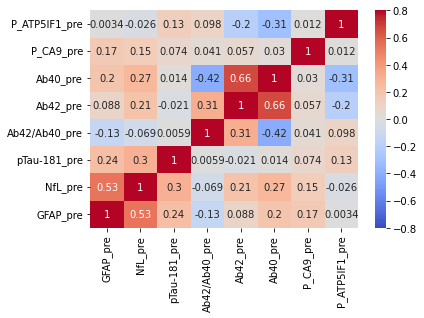

In [481]:

corr_map_pre= data.loc[all_matched,prot_els_pre[::-1]+vars['dev_pre']].corr()
corr_map_pre= data.loc[all_matched,prot_els_pre[::-1]+vars['dev_pre']].corr()
np.fill_diagonal(corr_map_post.values,1)
#np.fill_diagonal(corr_map_pre.values,-)
mask_m = np.tril(corr_map_post,k=1)
ax=sns.heatmap(corr_map_pre,cmap="coolwarm",vmin=-.8,vmax=.8, annot=True)
ax.invert_yaxis()

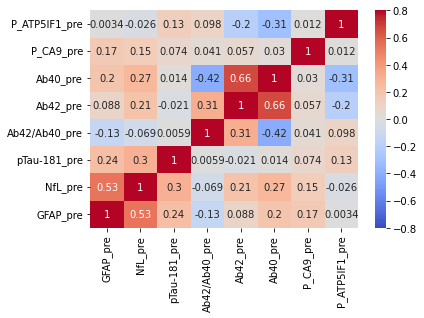

In [482]:

corr_map_pre= data.loc[all_matched,prot_els_post[::-1]+vars['dev_pre']].corr()
corr_map_pre= data.loc[all_matched,prot_els_pre[::-1]+vars['dev_pre']].corr()
np.fill_diagonal(corr_map_post.values,1)
#np.fill_diagonal(corr_map_pre.values,-)
mask_m = np.tril(corr_map_post,k=1)
ax=sns.heatmap(corr_map_pre,cmap="coolwarm",vmin=-.8,vmax=.8, annot=True)
ax.invert_yaxis()

In [ ]:
# (table,pvals,pvals_corr,sigs,betas,resultstable_ext)=model_table(outpts,['adni_mean','cog_vars_gi','GeneralHealth'],['_post_cl_simp_modpre'],['Case_bin','22001-0.0','Age-3.0','assessment_sep','assessment_sep^2','pre'],beta_dirs=[1,-1,-1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],beta_vars=[1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1],FPR='row',alpha=0.05,returndata=True)
# table=table.rename(columns=cols_translate)
# table=table.rename(columns={'Age (pandemic)':'Age (y)'})
# table=table.rename(index={'Ab40':'Aβ40','Ab42':'Aβ42','Ab42/Ab40':'Aβ42/Aβ40','pTau-181':'pTau-181','NfL':'NfL','GFAP':'GFAP'})
# # table.to_excel('tables_test/ADNI_model.xlsx')
# table.style.format()

# Time plots and GPs 


In [ ]:
# from scipy.stats import norm
# tmp=np.zeros(11)
# tmp[8]=1
# np.dot(norm.pdf(np.arange(11),loc=5,scale=1),tmp)

0.0044318484119380075

In [1450]:
# els=(data.loc[:,IDP].notnull())&all_matched #((data.loc[:,'COVID']=='COVID')) #& (data[IDPb]>mm)# &((data.loc[:,'COVID']=='COVID')) ##&(data.loc[:,'matched_age_mean']>75) # &(data.loc[:,time].notnull())
# ids=data.loc[data.loc[els,'matched_eid'],IDP].dropna().index
# ids2=data.loc[ids,'matched_eid']
# els[:]=False
# els[ids]=True 
# els[ids2]=True

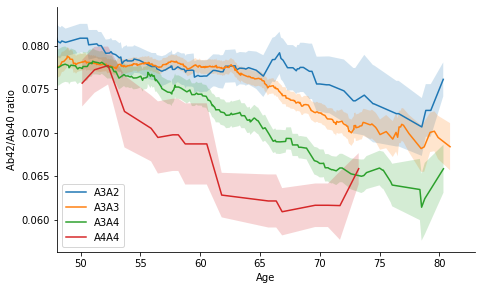

In [ ]:
# Grouping by APOE
IDP='Ab42/Ab40_regPl_pre_cl'
#sns.scatterplot(data=data,x='Age-2.0',y='Ab42/Ab40_regPl_pre',hue='Case',alpha=0.3)#.loc[data['APOE']=='A3A4'
time_plot(data.loc[els,:],IDP,groupby='APOE',grps=['A3A2','A3A3','A3A4','A4A4'],time='Age-2.0_d',rolling="3650d",xlim=[48,83],xlabel='Age',ylabel='Ab42/Ab40 ratio',loc='lower left',leg=True)# {"A3A2":"APOE-ε2ε3","A3A3":"APOE-ε3ε3","A3A4":"APOE-ε3ε4","A4A4":"APOE-ε4ε4"})#,'sars_hosp':"COVID-Hospitalised"})#,ylim=[-0.01,0])#,ylim=[-0.01,0.005])
fig=plt.gcf()
fig.set_size_inches(7.5,4.5)

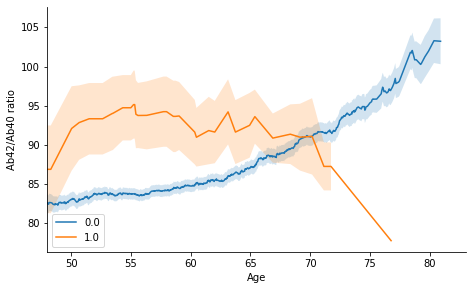

In [522]:
# Smoking 
# IDP='Ab40_regPl_pre_cl'
# els=all_matched
# #sns.scatterplot(data=data,x='Age-2.0',y='Ab42/Ab40_regPl_pre',hue='Case',alpha=0.3)#.loc[data['APOE']=='A3A4'
# time_plot(data.loc[els,:],IDP,groupby='Smoking_bin-2.0',time='Age-2.0_d',rolling="3650d",xlim=[48,83],xlabel='Age',ylabel='Ab42/Ab40 ratio',loc='lower left',leg=True)# {"A3A2":"APOE-ε2ε3","A3A3":"APOE-ε3ε3","A3A4":"APOE-ε3ε4","A4A4":"APOE-ε4ε4"})#,'sars_hosp':"COVID-Hospitalised"})#,ylim=[-0.01,0])#,ylim=[-0.01,0.005])
# fig=plt.gcf()
# fig.set_size_inches(7.5,4.5)

<Axes: title={'center': 'difference'}>

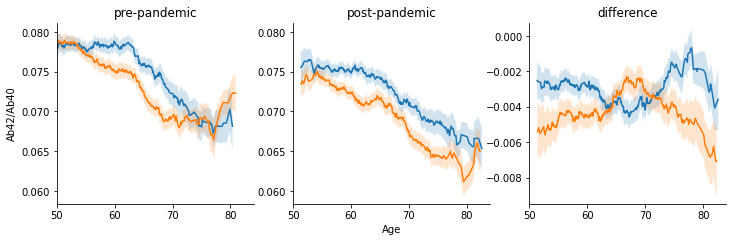

In [ ]:
all_plt('Ab42/Ab40_regPl','Ab42/Ab40',smth="2555d",loc='lower left',leg=False,savename='Ab_ratio')

<Axes: title={'center': 'difference'}>

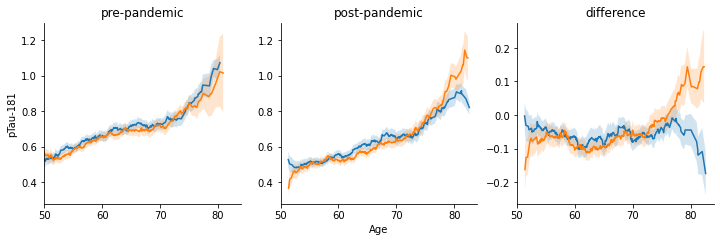

In [ ]:
all_plt('pTau-181_regPl','pTau-181',smth="2555d",loc=None,savename='pTau-181')

<Axes: title={'center': 'difference'}>

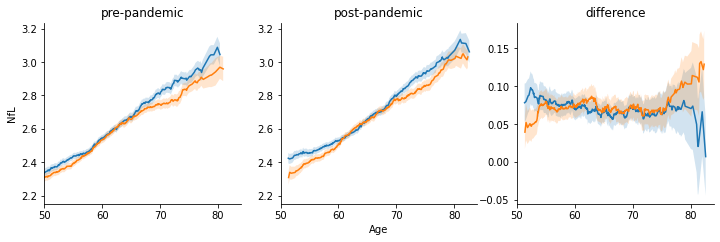

In [ ]:
all_plt('NfL_regPl','NfL',smth="3650d",loc="lower left")

<Axes: title={'center': 'difference'}>

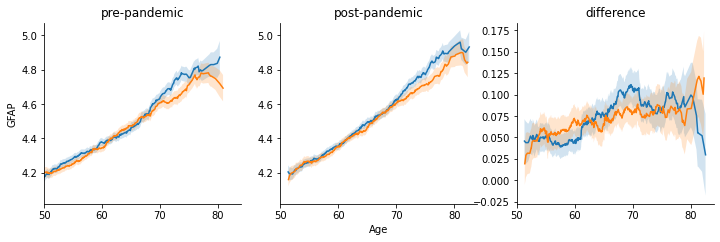

In [ ]:
all_plt('GFAP_regPl','GFAP',smth="3650d",loc="lower left")

<Axes: title={'center': 'difference'}>

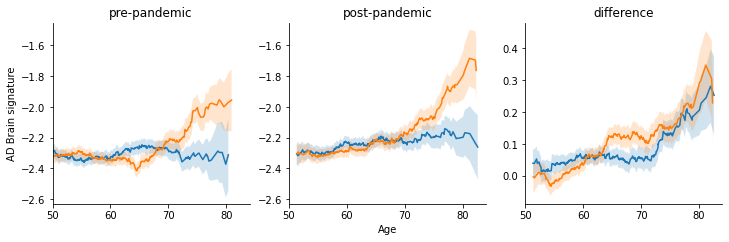

In [ ]:
all_plt('adni_mean_cl','AD Brain signature',smth="3650d",loc=None,pre='-2.0',cl='')

## 